<a href="https://colab.research.google.com/github/Rainyryan/ece547_project_1/blob/main/ece547_project1_problem2_Ryan_Chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem (2)

## (a)
Write a computer program to generate an Erlang random variable X with k phases,
with E[X] = 1/10. An Erlang random variable with k phases is defined as the sum of k
i.i.d. exponential random variables. For both the case k = 4 and the case k = 40, use
the random numbers generated by your simulation to estimate P(X > x) for each value
of x, and plot P(X > x) as a function of x.

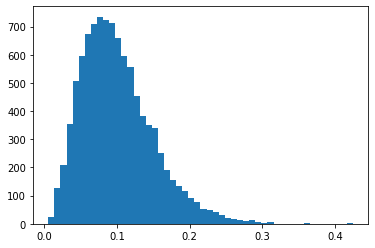

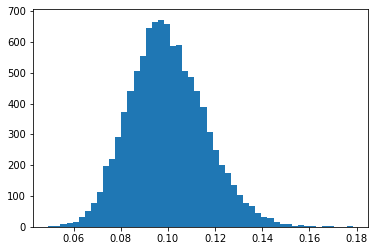

0.1005785444230746 0.09982178646809586


In [3]:
import random
import numpy as np
import statistics
import matplotlib.pyplot as plt

# Ryan is happy

def erlang(e, k, n=1):
    ret = []
    _lambda = k/e
    for num in range(n):
        x = 0
        for i in range(k):
            x += (-np.log(random.random()) / _lambda)
        ret.append(x)
    return ret

def exponential(_lambda, n):
    ret = []
    for num in range(n):
        ret.append(-np.log(random.random()) / _lambda)
    return ret

erl_k4 = erlang(1/10, 4, 10000)
erl_k40 = erlang(1/10, 40, 10000)

plt.hist(erl_k4, bins=50)
plt.show()

plt.hist(erl_k40, bins=50)
plt.show()
print(statistics.mean(erl_k4), statistics.mean(erl_k40))

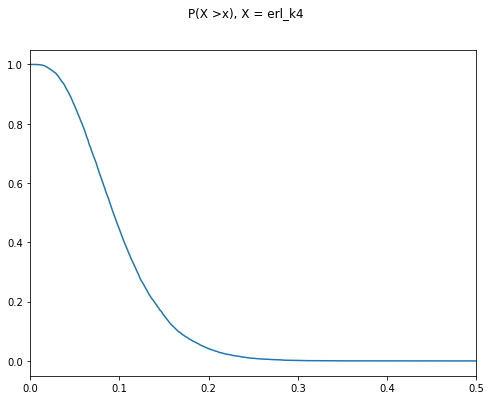

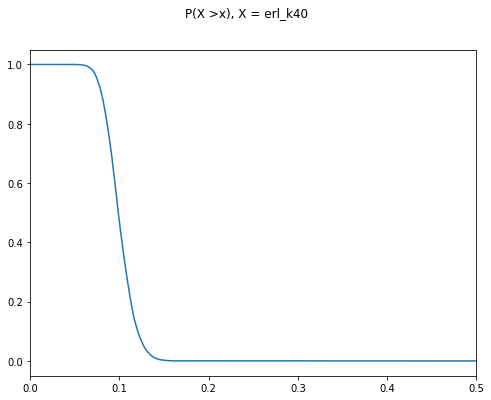

In [4]:
# efficient way of plotting P(X > x)
_erl_k4 = erl_k4
_erl_k4.sort(reverse=True) # have _erl_k4 in sorted descending order so the index of i would be #of points with val greater than i
_erl_k4.insert(0,len(_erl_k4)) # insert at front a point that would show on the plot as (0,1)
_erl_k4.append(0) # append at end a point that would show on the plot as (x,0), x being the largest x-axis value in the plot 

plt.figure(figsize=(8,6)).suptitle('P(X >x), X = erl_k4')
plt.plot(_erl_k4, np.linspace(0, 1, len(_erl_k4)))
plt.xlim([0, 0.5])
plt.show()

_erl_k40 = erl_k40
_erl_k40.sort(reverse=True)
_erl_k40.insert(0,len(_erl_k40))
_erl_k40.append(0)

plt.figure(figsize=(8,6)).suptitle('P(X >x), X = erl_k40')
plt.plot(_erl_k40, np.linspace(0, 1, len(_erl_k40)))
plt.xlim([0, 0.5])
plt.show()

## (b)
Write a computer program that simulates an M/Ek/1 queue. Here, Ek is an Erlang
random variable with k phase.

In [5]:
def erlang_single_val(e, k):
    _lambda = k/e
    x = 0
    for i in range(k):
        x += (-np.log(random.random()) / _lambda)
    return x

def simulate_queue(k=4, _lambda=8, _mu=10, temp_res=1000, total_duration=10000):
    #simulation variables
    # temp_res = 1000 # temporal resolution 1000
    # total_duration = 10000 #10000
    global times
    times = []

    # arrival variables
    arrival_time = 0
    departure_time = 0
    arrival_times = [] # arrival_times[i] stores the time at i'th arrival
    departure_times = [] # departure_times[i] stores the time at i'th departure
    global inter_arrival_times # inter_arrival_times[i] stores the time between i'th arrival and (i+1)'th arrival
    inter_arrival_times = []
    
    # service variables
    e = 1/_mu
    service_time = 0.0
    service_times = []
    global service_durations
    service_durations = []
    busy = 0
    
    # queue variables
    queue_length = 0
    global queue_lengths
    queue_lengths = []


    n = random.random()
    arrival_time = np.random.exponential(1/_lambda)#-math.log(n) / _lambda
    arrival_times.append(arrival_time)
    inter_arrival_times.append(arrival_time)

    #print("time, next arrival time, next service time, queue_length")
    for time in range(total_duration*temp_res):
        #print(time, arrival_time*temp_res, service_time*temp_res, queue_length)
        # record state
        times.append(time)
        queue_lengths.append(queue_length)
        # arrival simulation
        if(time > arrival_time*temp_res):
            queue_length += 1
            inter_arrival_time = np.random.exponential(1/_lambda)
            arrival_time = time/temp_res + inter_arrival_time;
            arrival_times.append(arrival_time)
            inter_arrival_times.append(inter_arrival_time)
        # service finish condition
        if(time > service_time*temp_res and queue_length > 0 and busy):
            departure_time = time/temp_res
            departure_times.append(departure_time)
            queue_length -= 1
            busy = 0
        # service start condition
        if(time > service_time*temp_res and queue_length > 0 and not busy):
            service_duration = erlang_single_val(e, k)
            service_time = time/temp_res + service_duration
            service_times.append(service_time)
            service_durations.append(service_duration)
            busy = 1
        
simulate_queue(4, 8, 10)
print("E[n]: ", statistics.mean(queue_lengths))
# print(len(queue_lengths))

E[n]:  2.831378


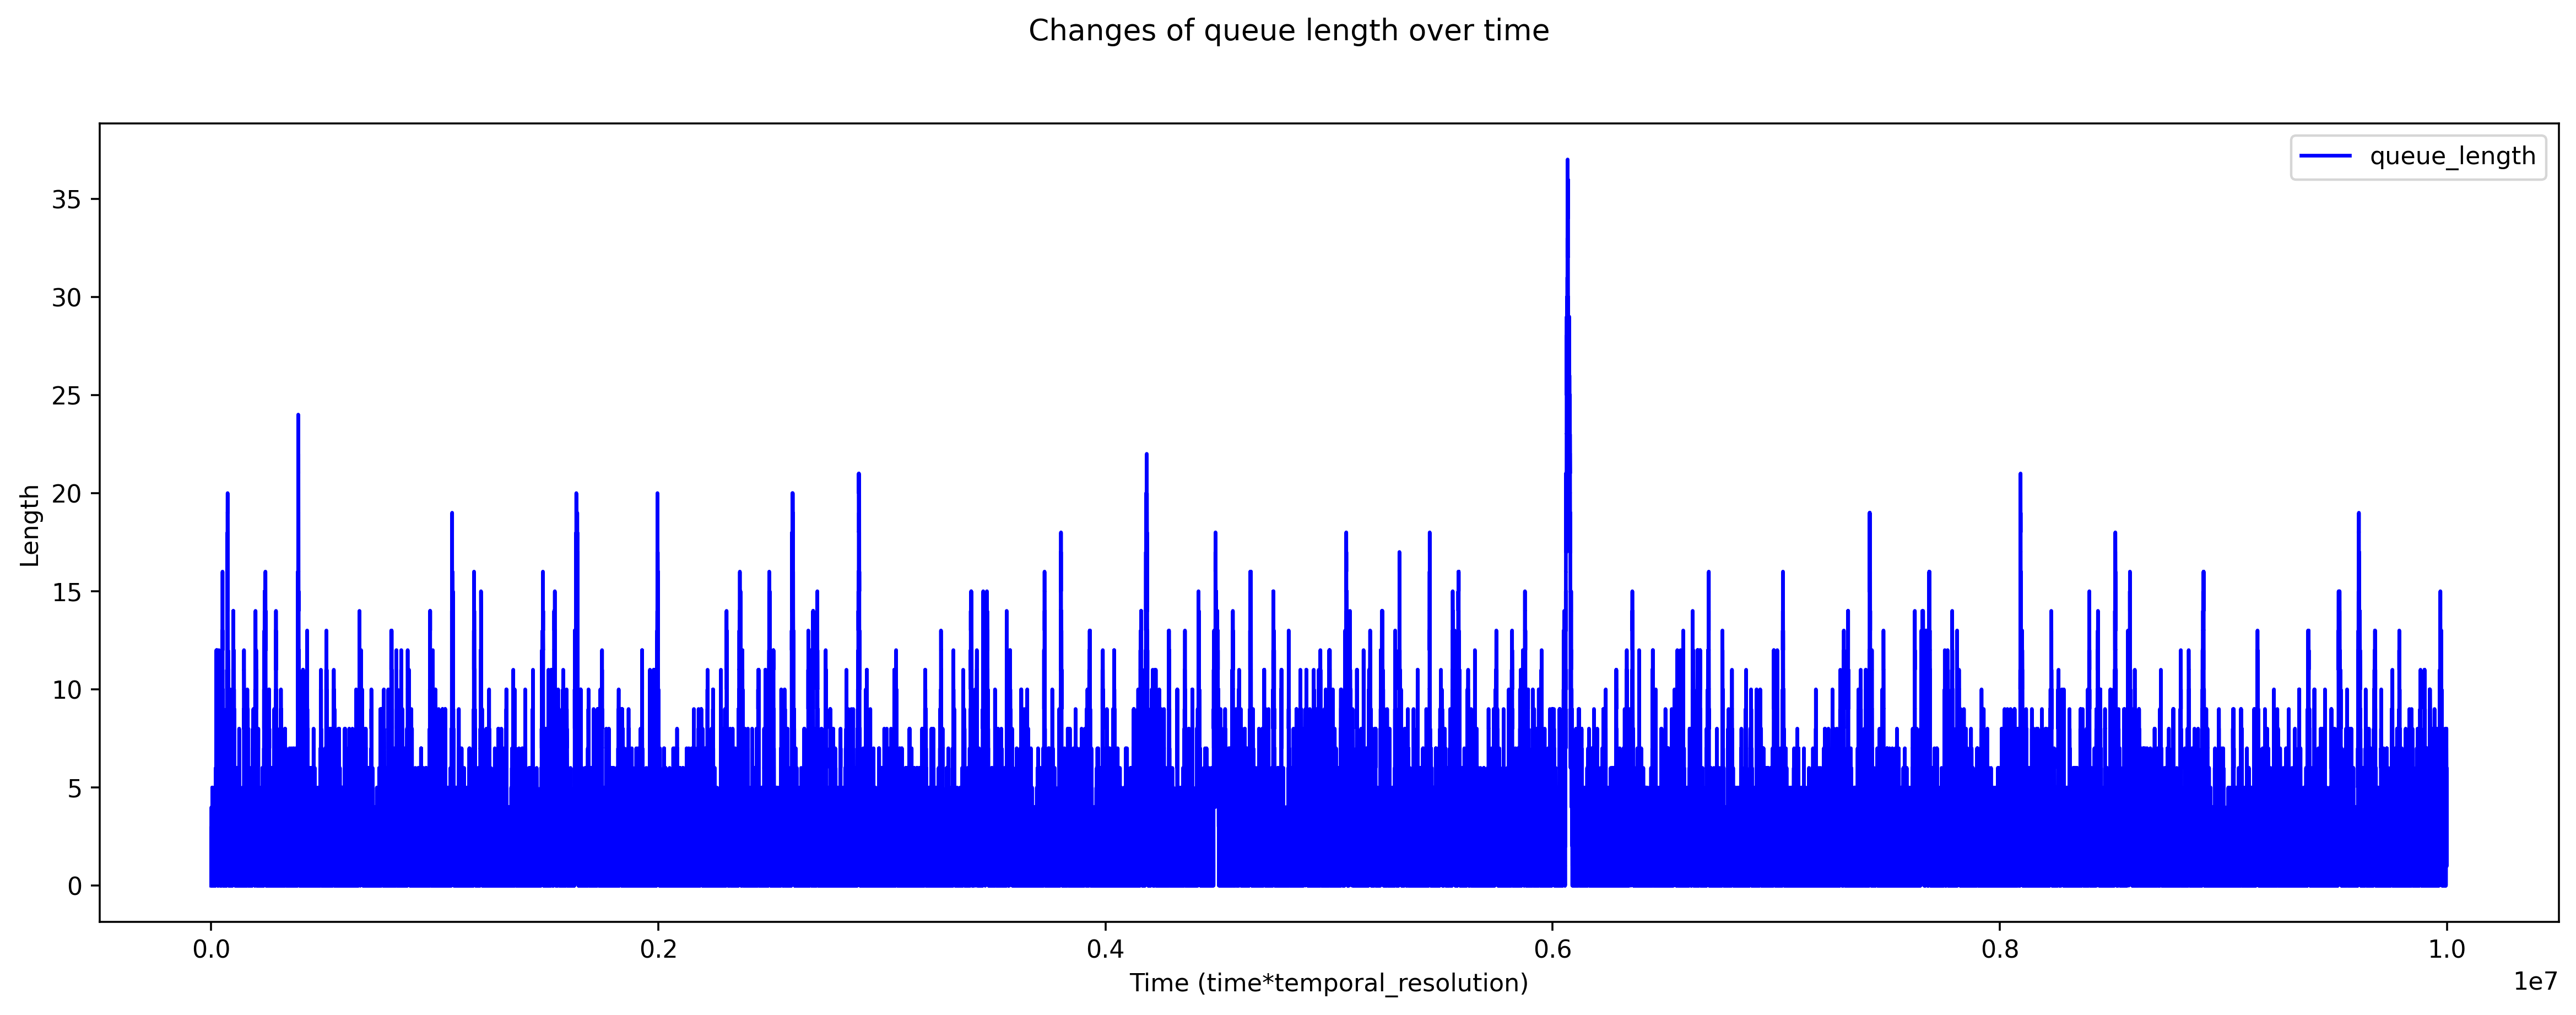

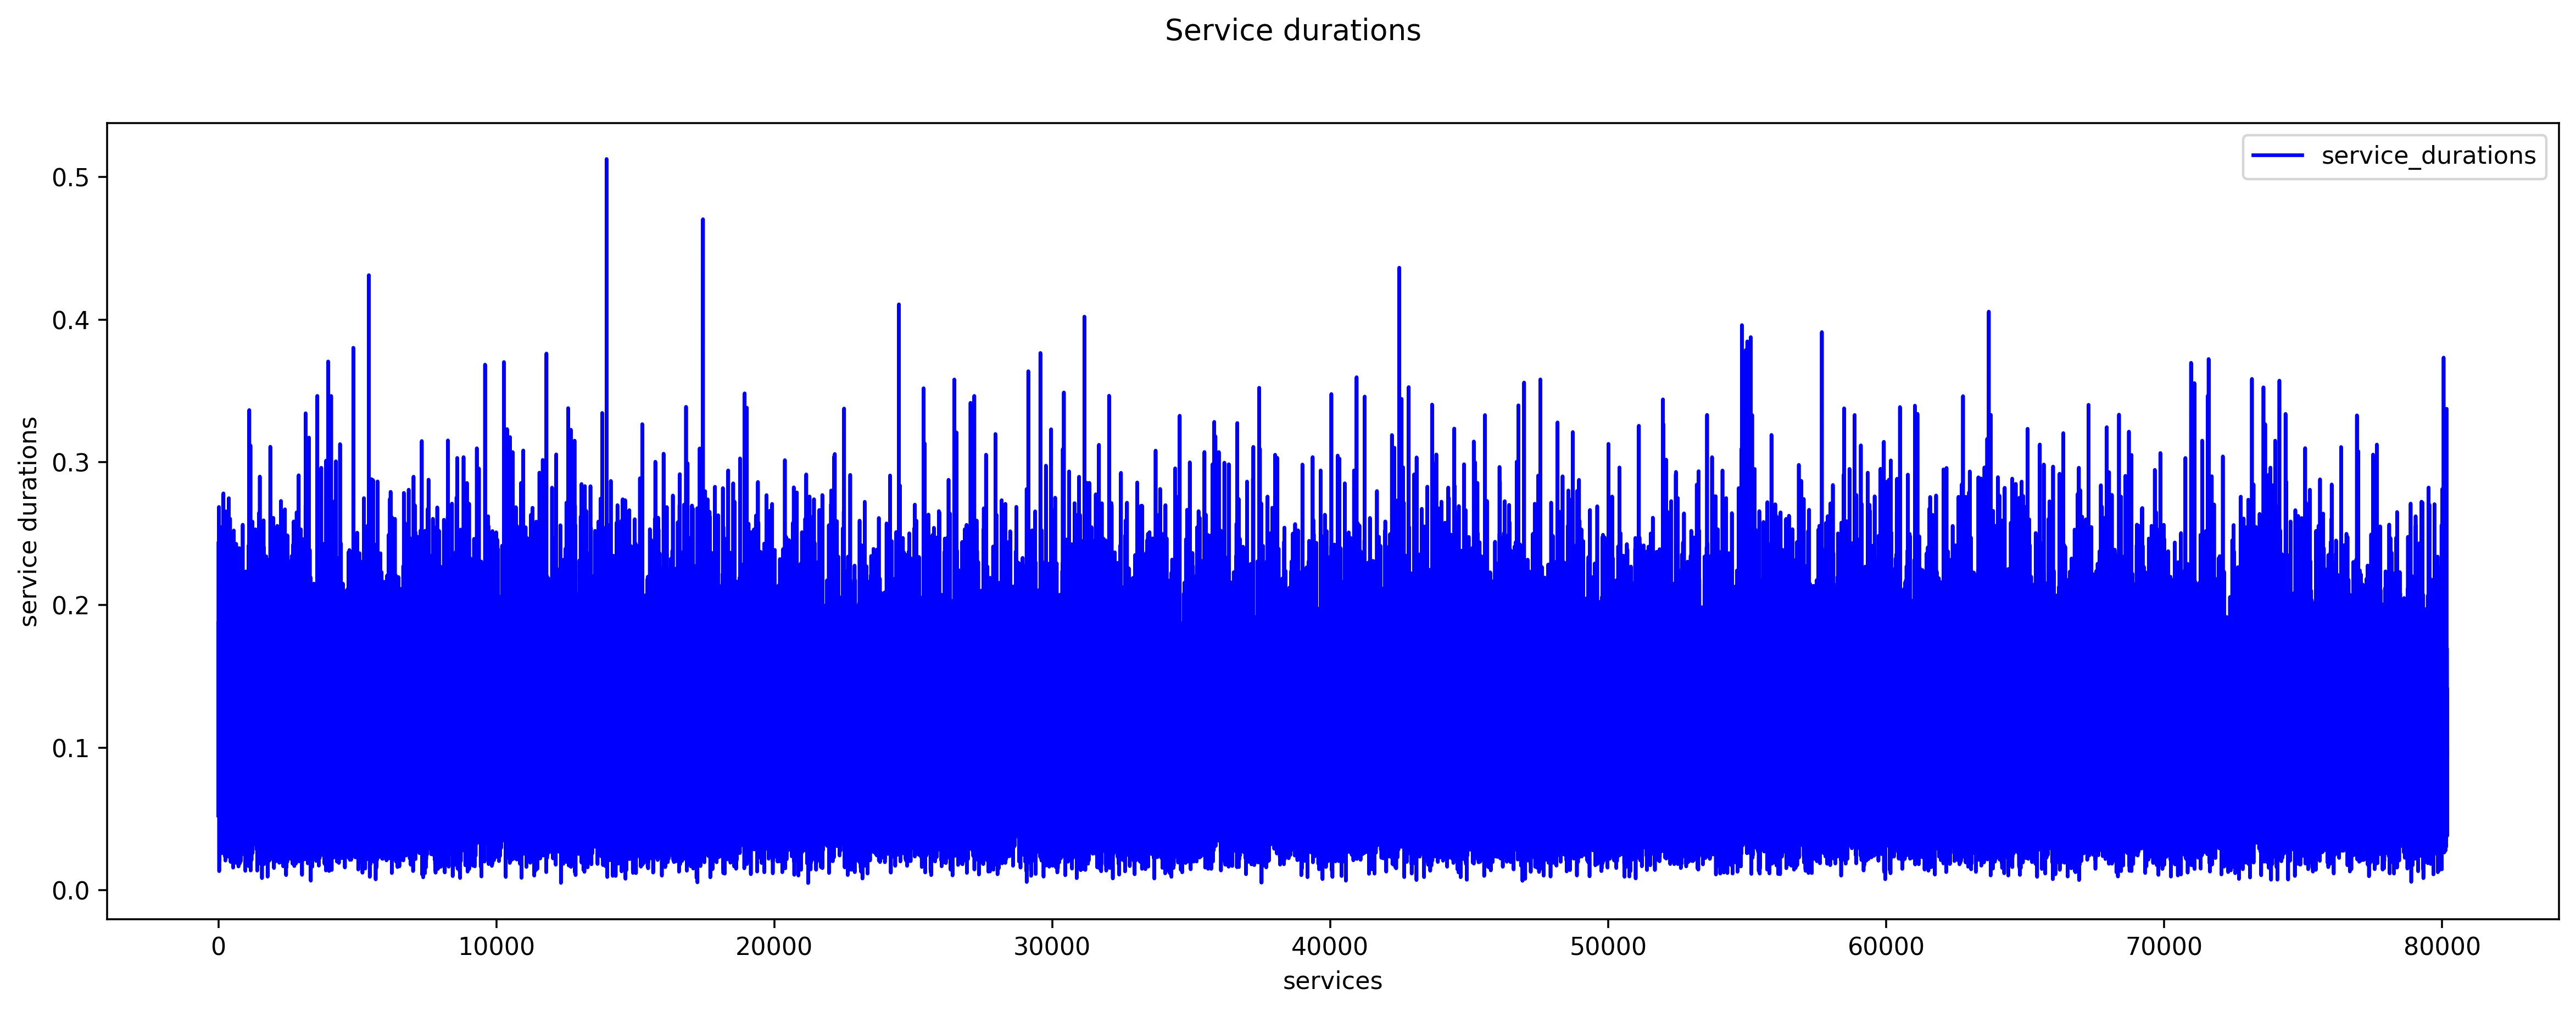

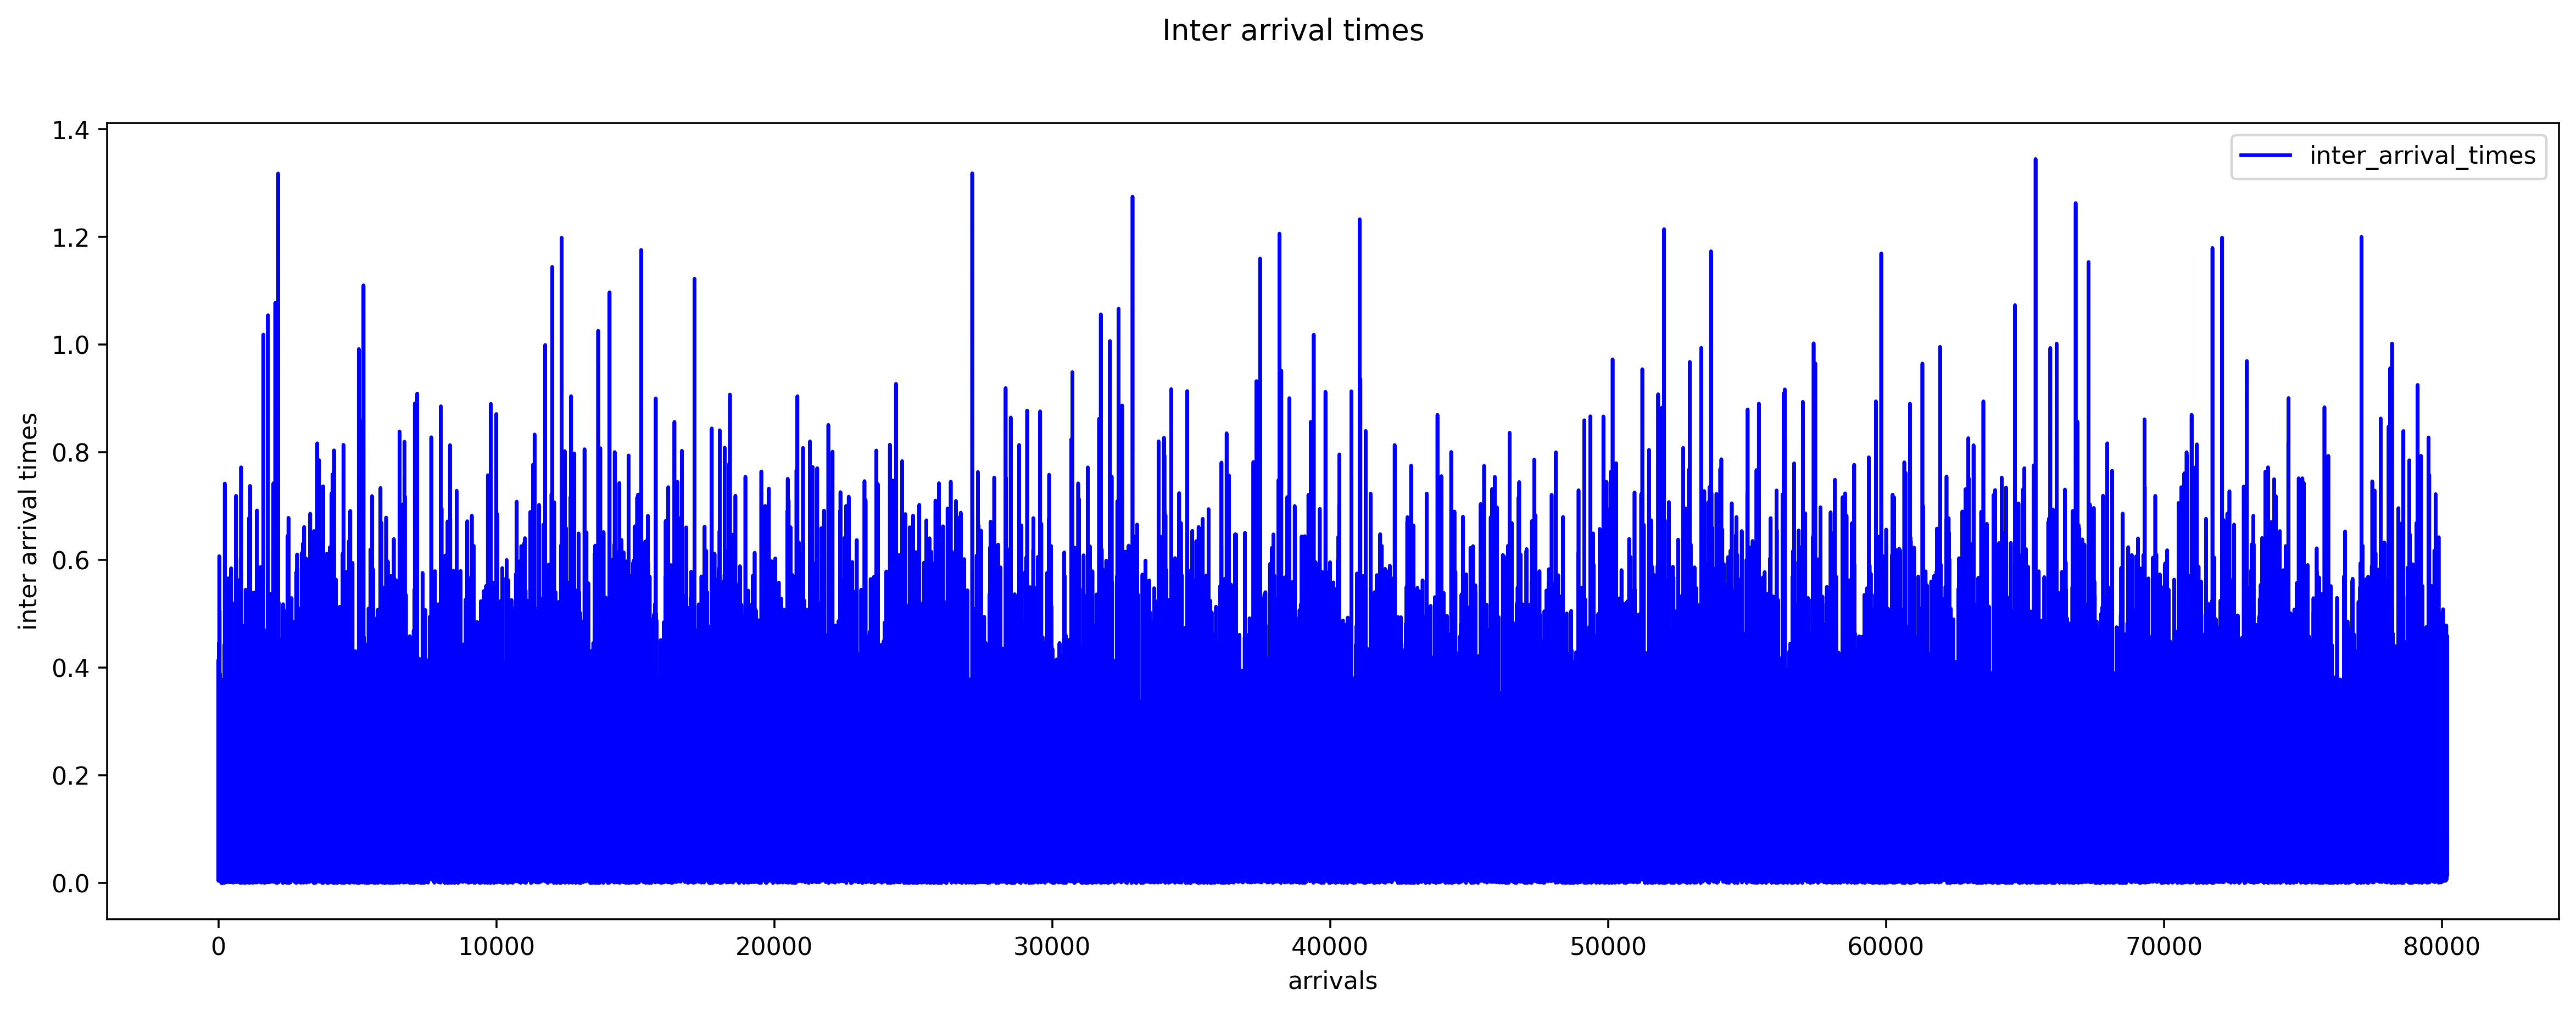

In [6]:
def plot_queue_data():
    # plot the queue_length against time
    fig = plt.figure(figsize=(18, 6), dpi=320)
    fig.suptitle('Changes of queue length over time')
    plot, = plt.plot(times, queue_lengths, 'b-', label='queue_length')
    plt.legend(handles=[plot])
    plt.xlabel('Time (time*temporal_resolution)') # need to consider the temporal resolution
    plt.ylabel('Length')
    plt.show()
    

plot_queue_data()
# plot the service times
services = list(range(len(service_durations)))
fig = plt.figure(figsize=(18, 6), dpi=320)
fig.suptitle('Service durations')
plot, = plt.plot(services, service_durations, 'b-', label='service_durations')
plt.legend(handles=[plot])
plt.xlabel('services') # need to consider the temporal resolution
plt.ylabel('service durations')
plt.show()

# plot the inter arrival times
arrivals = list(range(len(inter_arrival_times)))
fig = plt.figure(figsize=(18, 6), dpi=320)
fig.suptitle('Inter arrival times')
plot, = plt.plot(arrivals, inter_arrival_times, 'b-', label='inter_arrival_times')
plt.legend(handles=[plot])
plt.xlabel('arrivals') # need to consider the temporal resolution
plt.ylabel('inter arrival times')
plt.show()


## (c)
Based on your simulaton, plot Pn against n when k = 4, λ = 8 and µ = 10. Note that
µ = 10 implies that the expected service time is 1/µ = 1/10. Also, find the expected
number of packets in the system. How do these results compare with your M/M/1
results in (1)?

[1971044, 2157237, 1695082, 1224805, 872286, 611720, 421424, 300642, 213506, 152733, 108529, 80656, 57074, 39554, 24286, 17956, 12134, 8498, 6330, 4611, 2909, 1674, 2034, 1844, 1078, 1549, 1217, 1181, 1706, 1162, 637, 372, 200, 686, 437, 664, 517, 26]
[0.1971044, 0.2157237, 0.1695082, 0.1224805, 0.0872286, 0.061172, 0.0421424, 0.0300642, 0.0213506, 0.0152733, 0.0108529, 0.0080656, 0.0057074, 0.0039554, 0.0024286, 0.0017956, 0.0012134, 0.0008498, 0.000633, 0.0004611, 0.0002909, 0.0001674, 0.0002034, 0.0001844, 0.0001078, 0.0001549, 0.0001217, 0.0001181, 0.0001706, 0.0001162, 6.37e-05, 3.72e-05, 2e-05, 6.86e-05, 4.37e-05, 6.64e-05, 5.17e-05, 2.6e-06]
1.0000000000000002


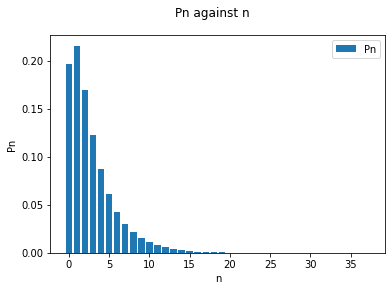

In [7]:
# calculate Pn
n = max(queue_lengths)+1
Cn = [0]*n
Pn = []
for data in queue_lengths:
    Cn[data] += 1
print(Cn)
for i in Cn:
    Pn.append(i/len(queue_lengths))
print(Pn)
print(sum(Pn))

# plot Pn against n
services = list(range(len(service_durations)))
fig = plt.figure()
fig.suptitle('Pn against n')
plot = plt.bar(list(range(n)), Pn, label='Pn')
plt.legend(handles=[plot])
plt.xlabel('n')
plt.ylabel('Pn')
plt.show()


## (d)
Now use k = 40. Vary the utilization ρ of the M/Ek/1 queue and run your simulations
again over a range of ρ. From your simulation, find the expected number of packets in
the system at each utilization level ρ. Plot the expected number of packets in the system
against the utilization level ρ when k = 40. Also, plot the expected number of packets
in the system against ρ for an M/D/1 queue using the theoretical results in class, and
compare the results with your simulation. What does this tell you and why?

E[n]:  0.1053168


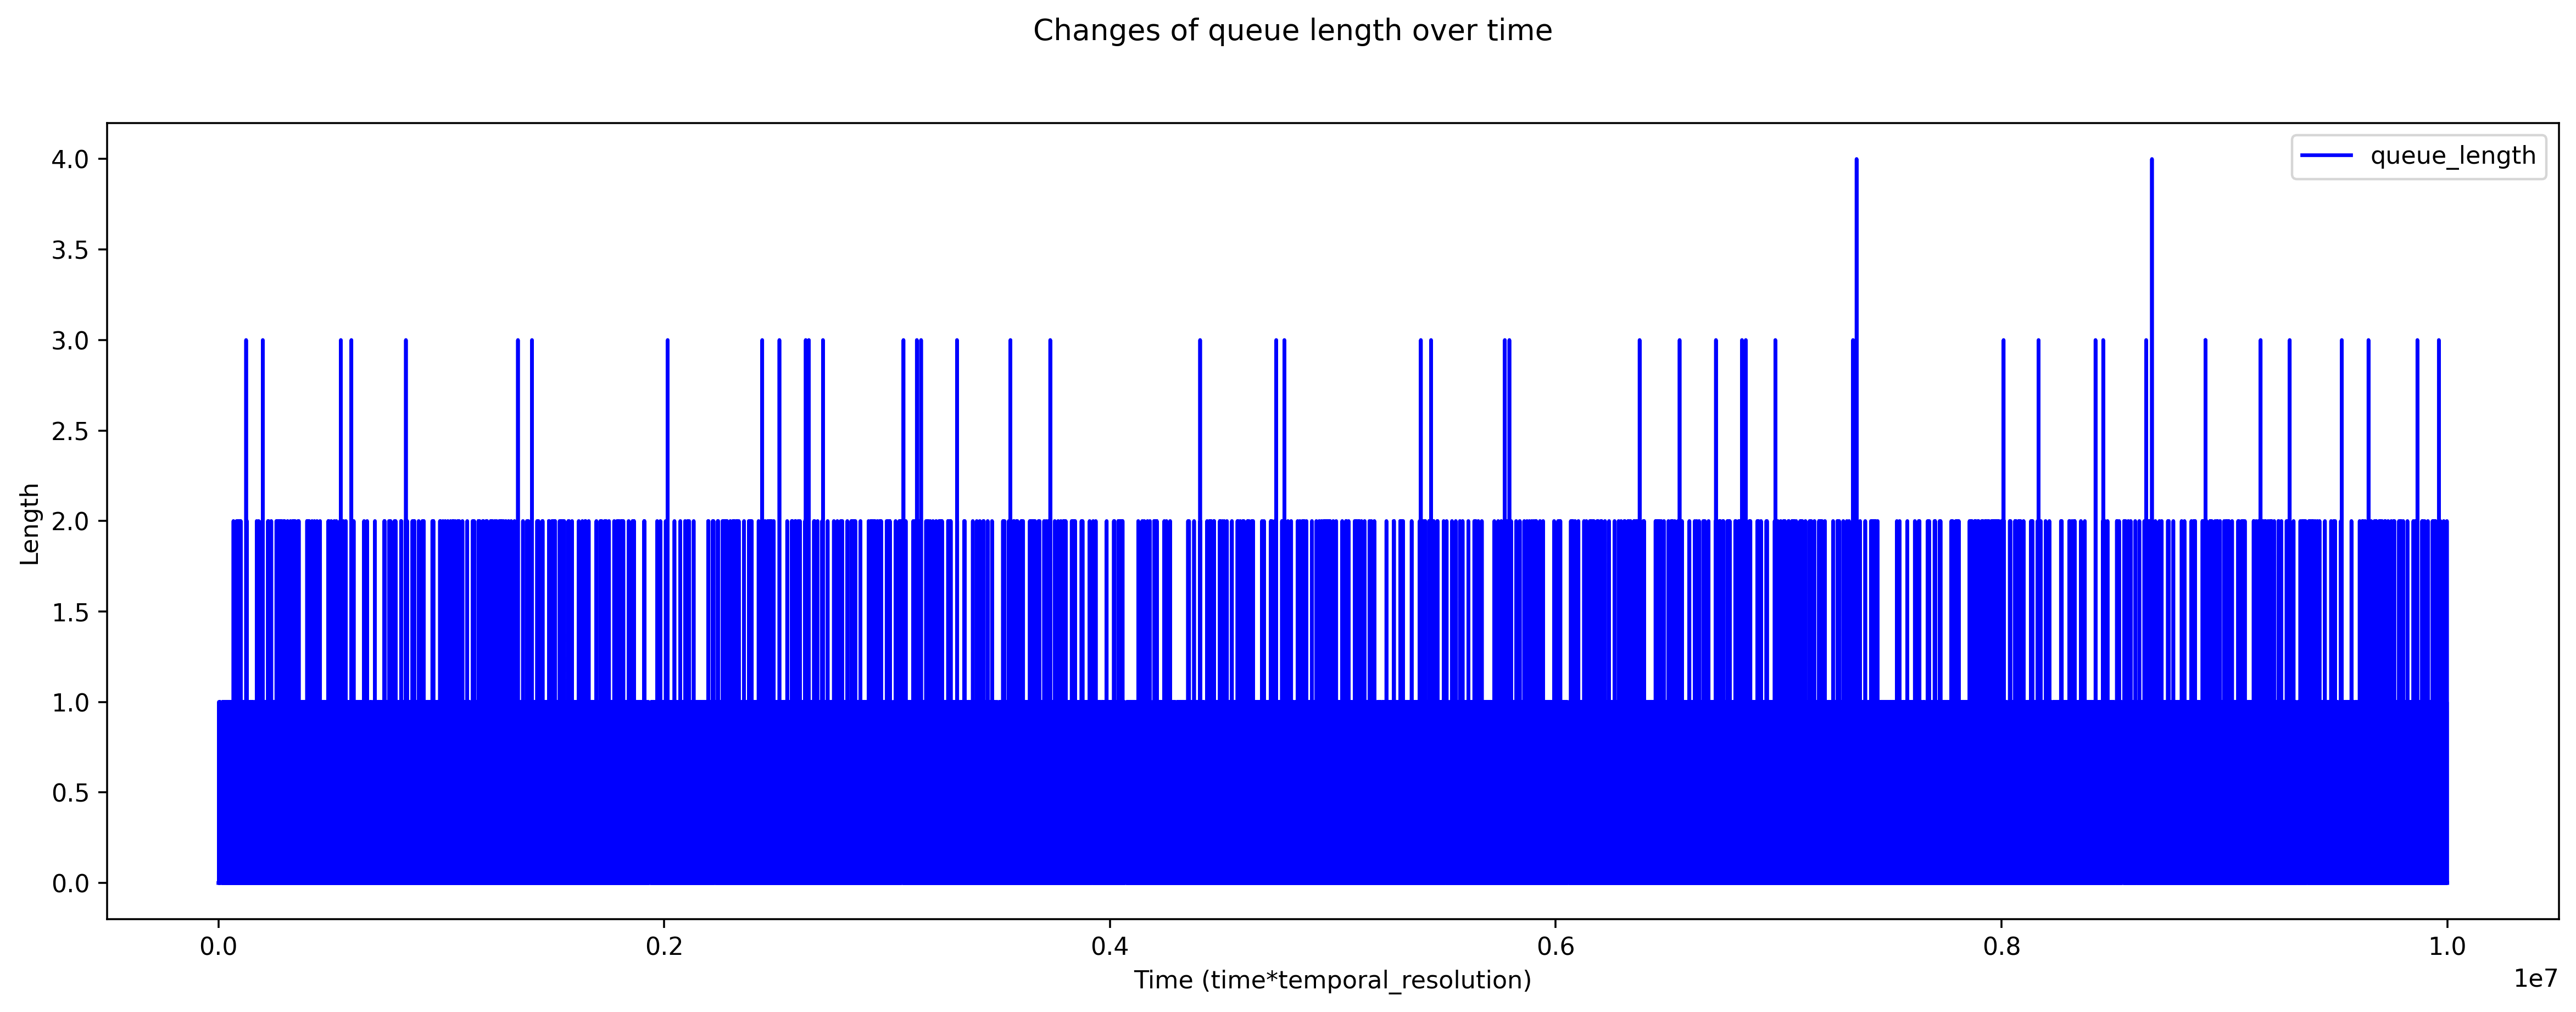

In [112]:
simulate_queue(40, 1, 10) # rho = 0.1
En1 = statistics.mean(queue_lengths)
print("E[n]: ", En1)
plot_queue_data()

E[n]:  0.2242908


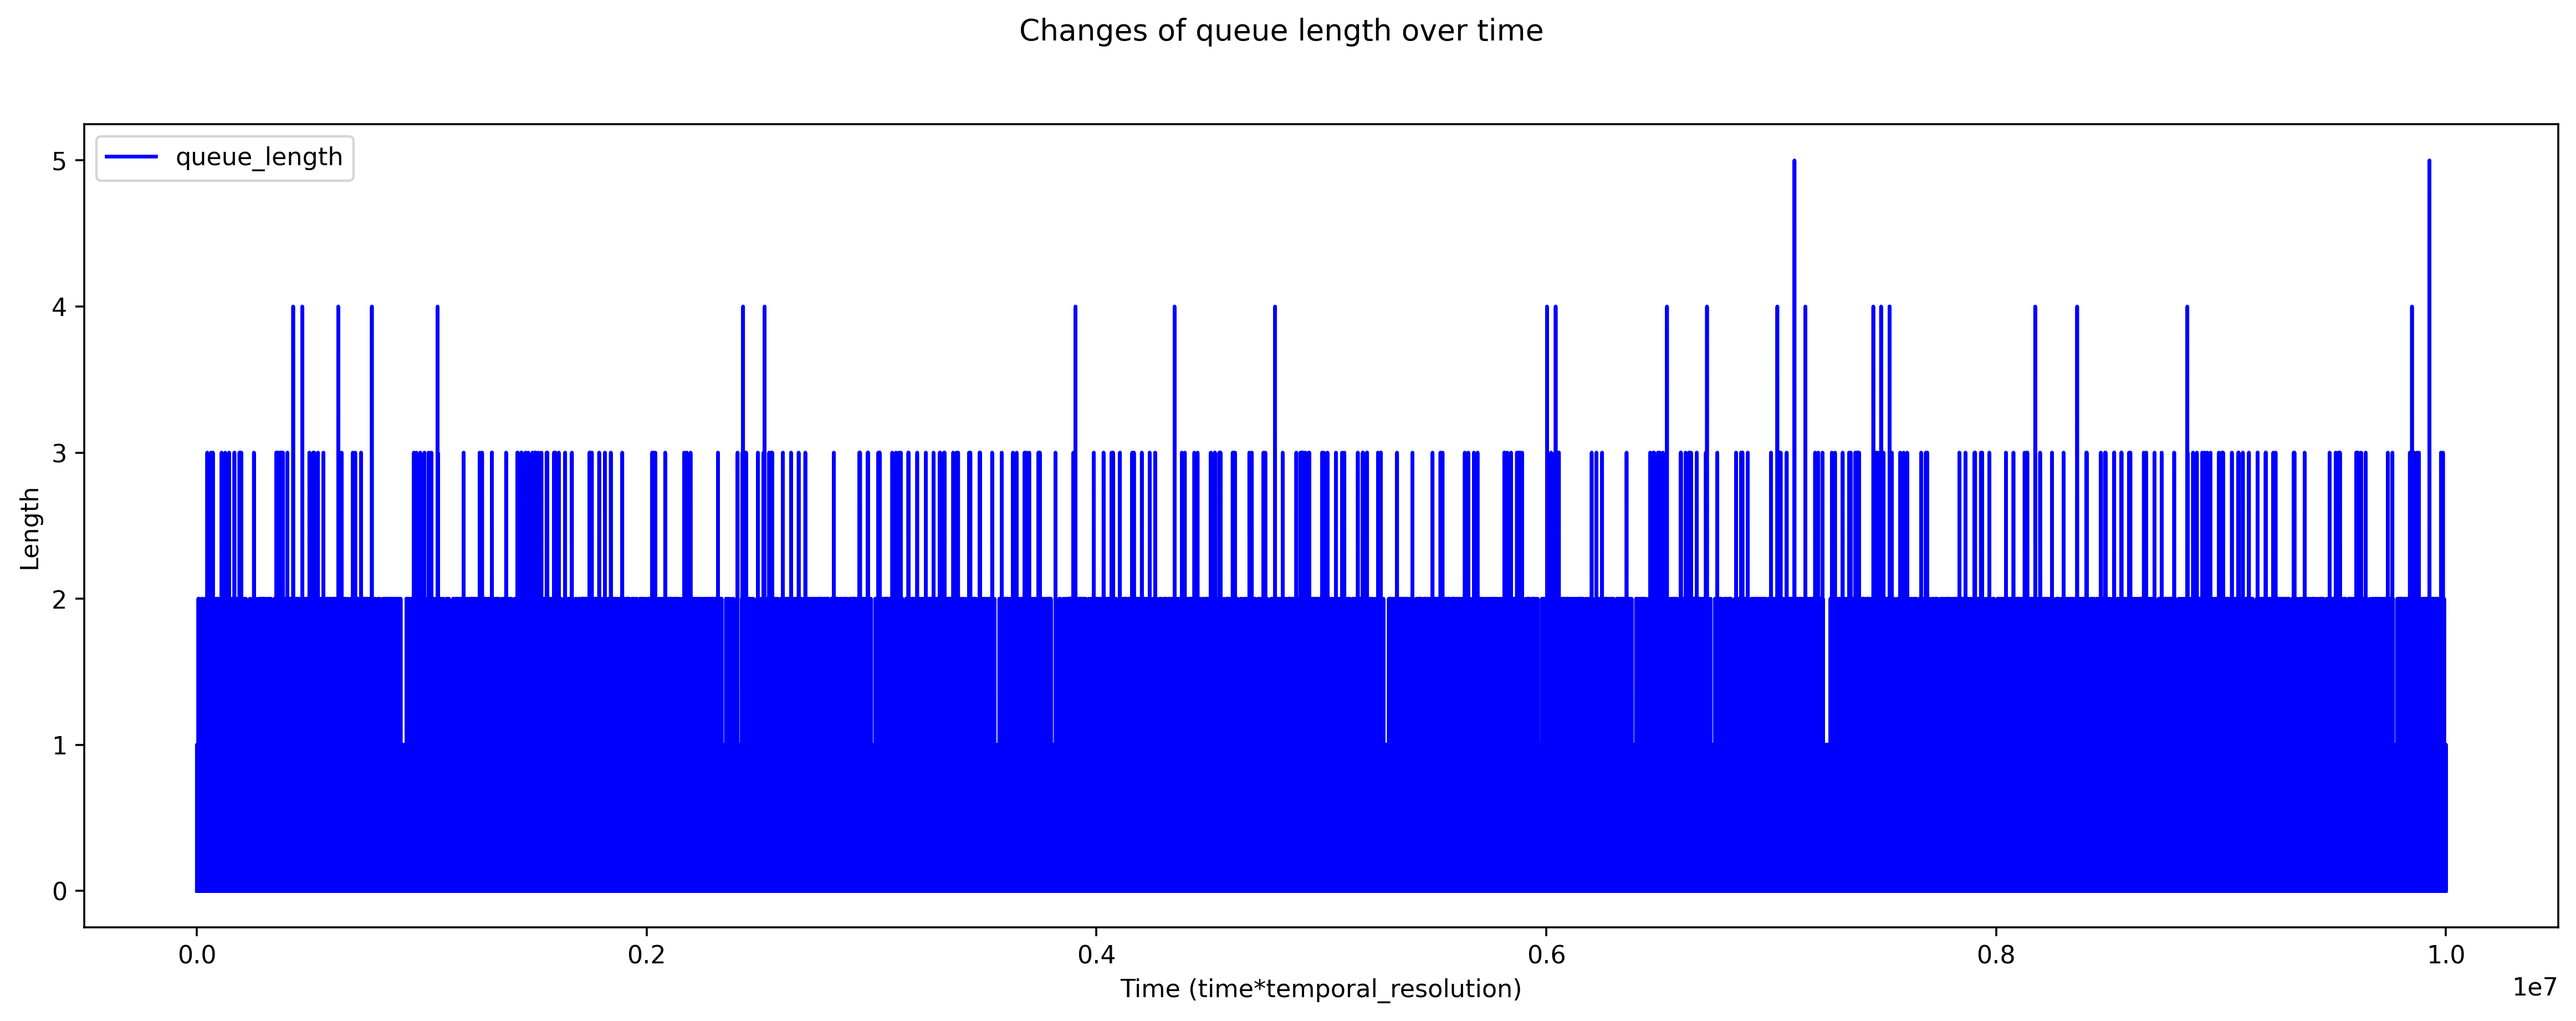

In [111]:
simulate_queue(40, 2, 10) # rho = 0.2
En2 = statistics.mean(queue_lengths)
print("E[n]: ", En2)
plot_queue_data()

E[n]:  0.372851


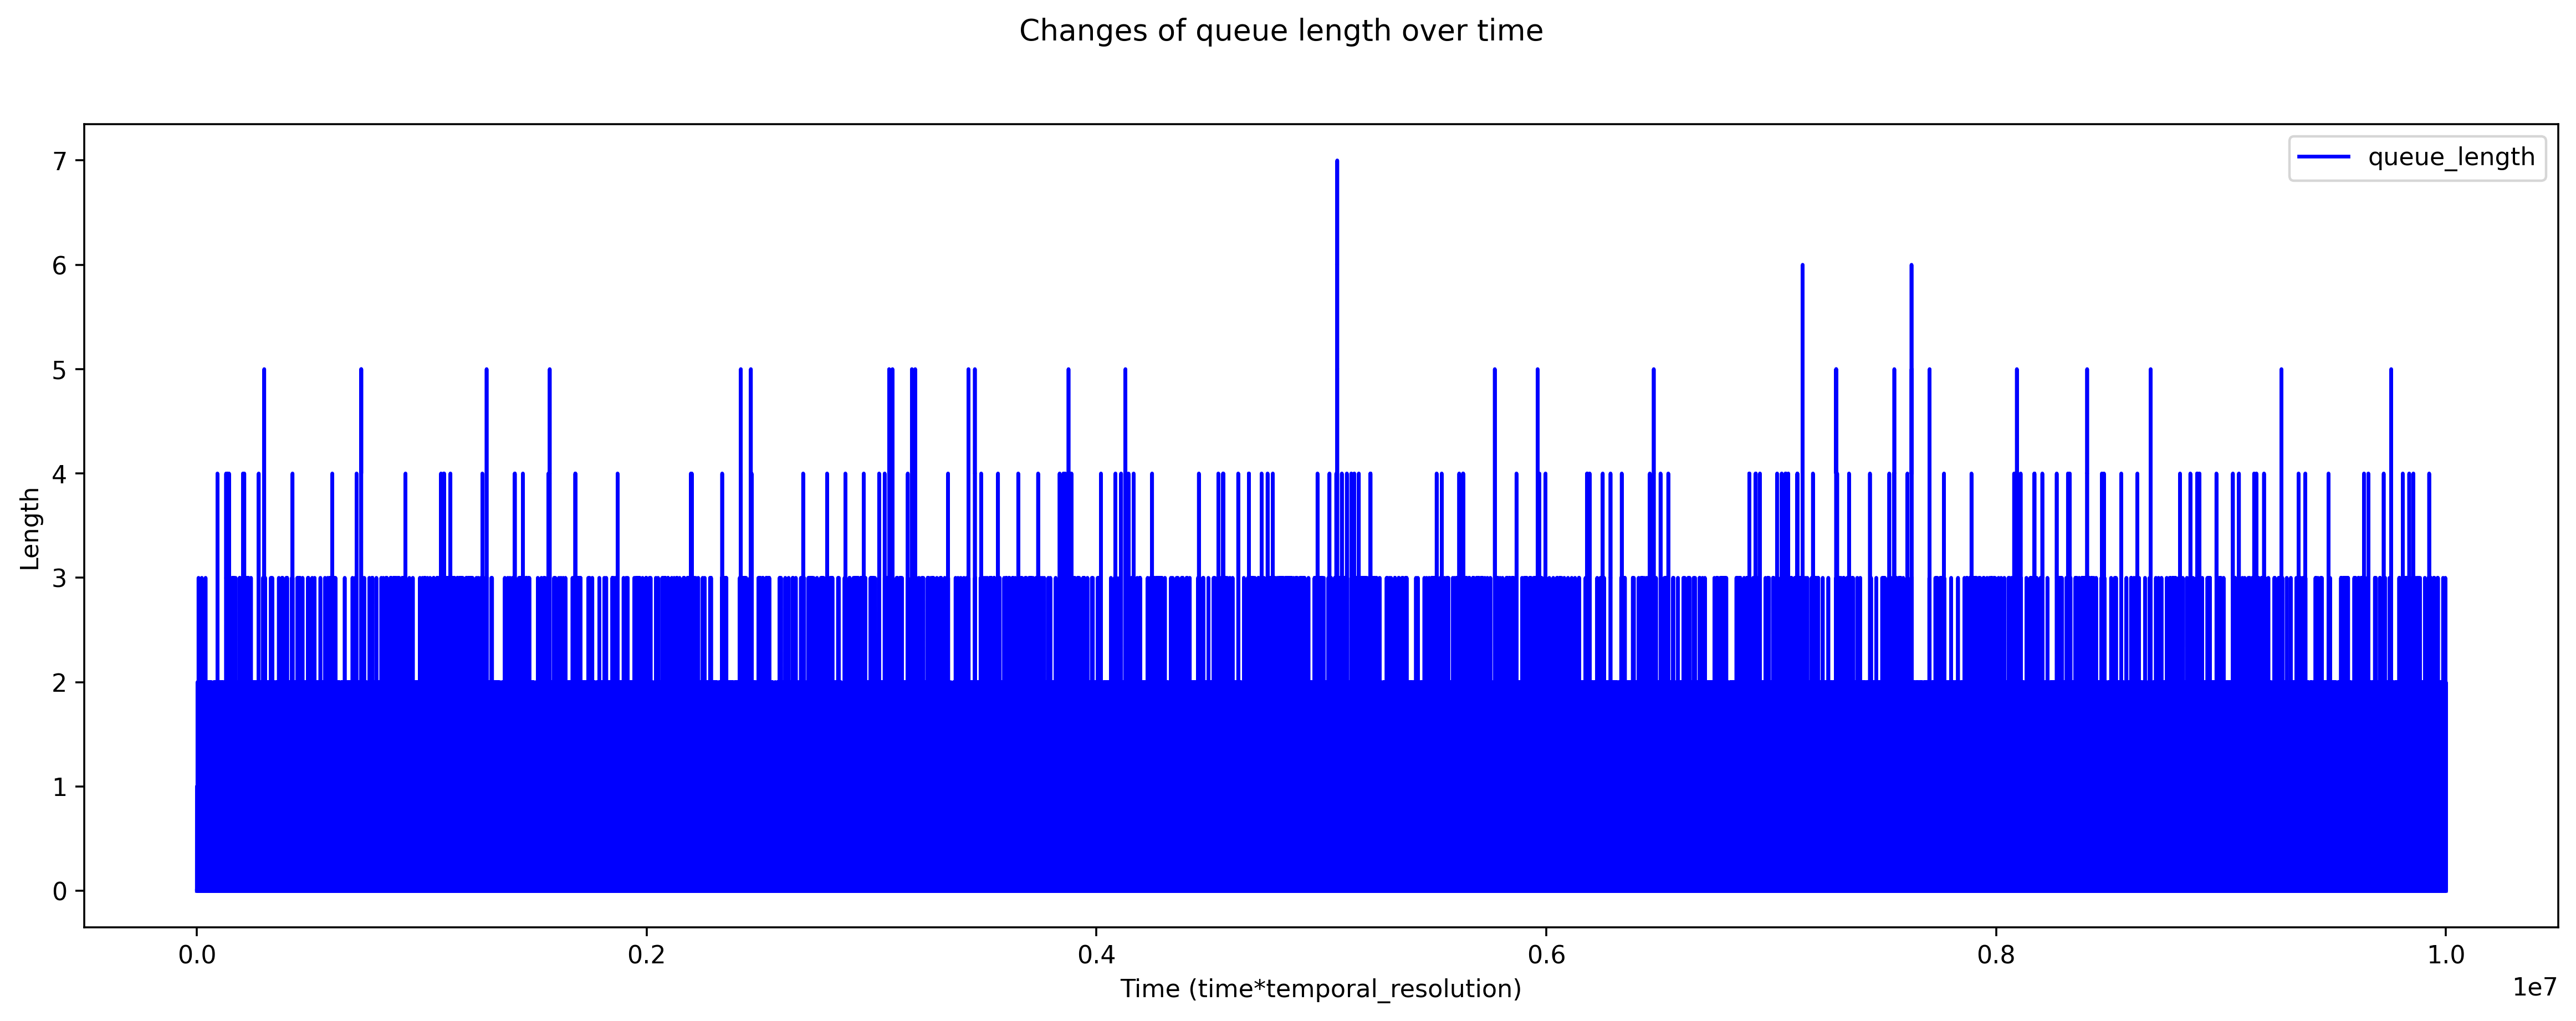

In [110]:
simulate_queue(40, 3, 10) # rho = 0.3
En3 = statistics.mean(queue_lengths)
print("E[n]: ", En3)
plot_queue_data()

E[n]:  0.5450714


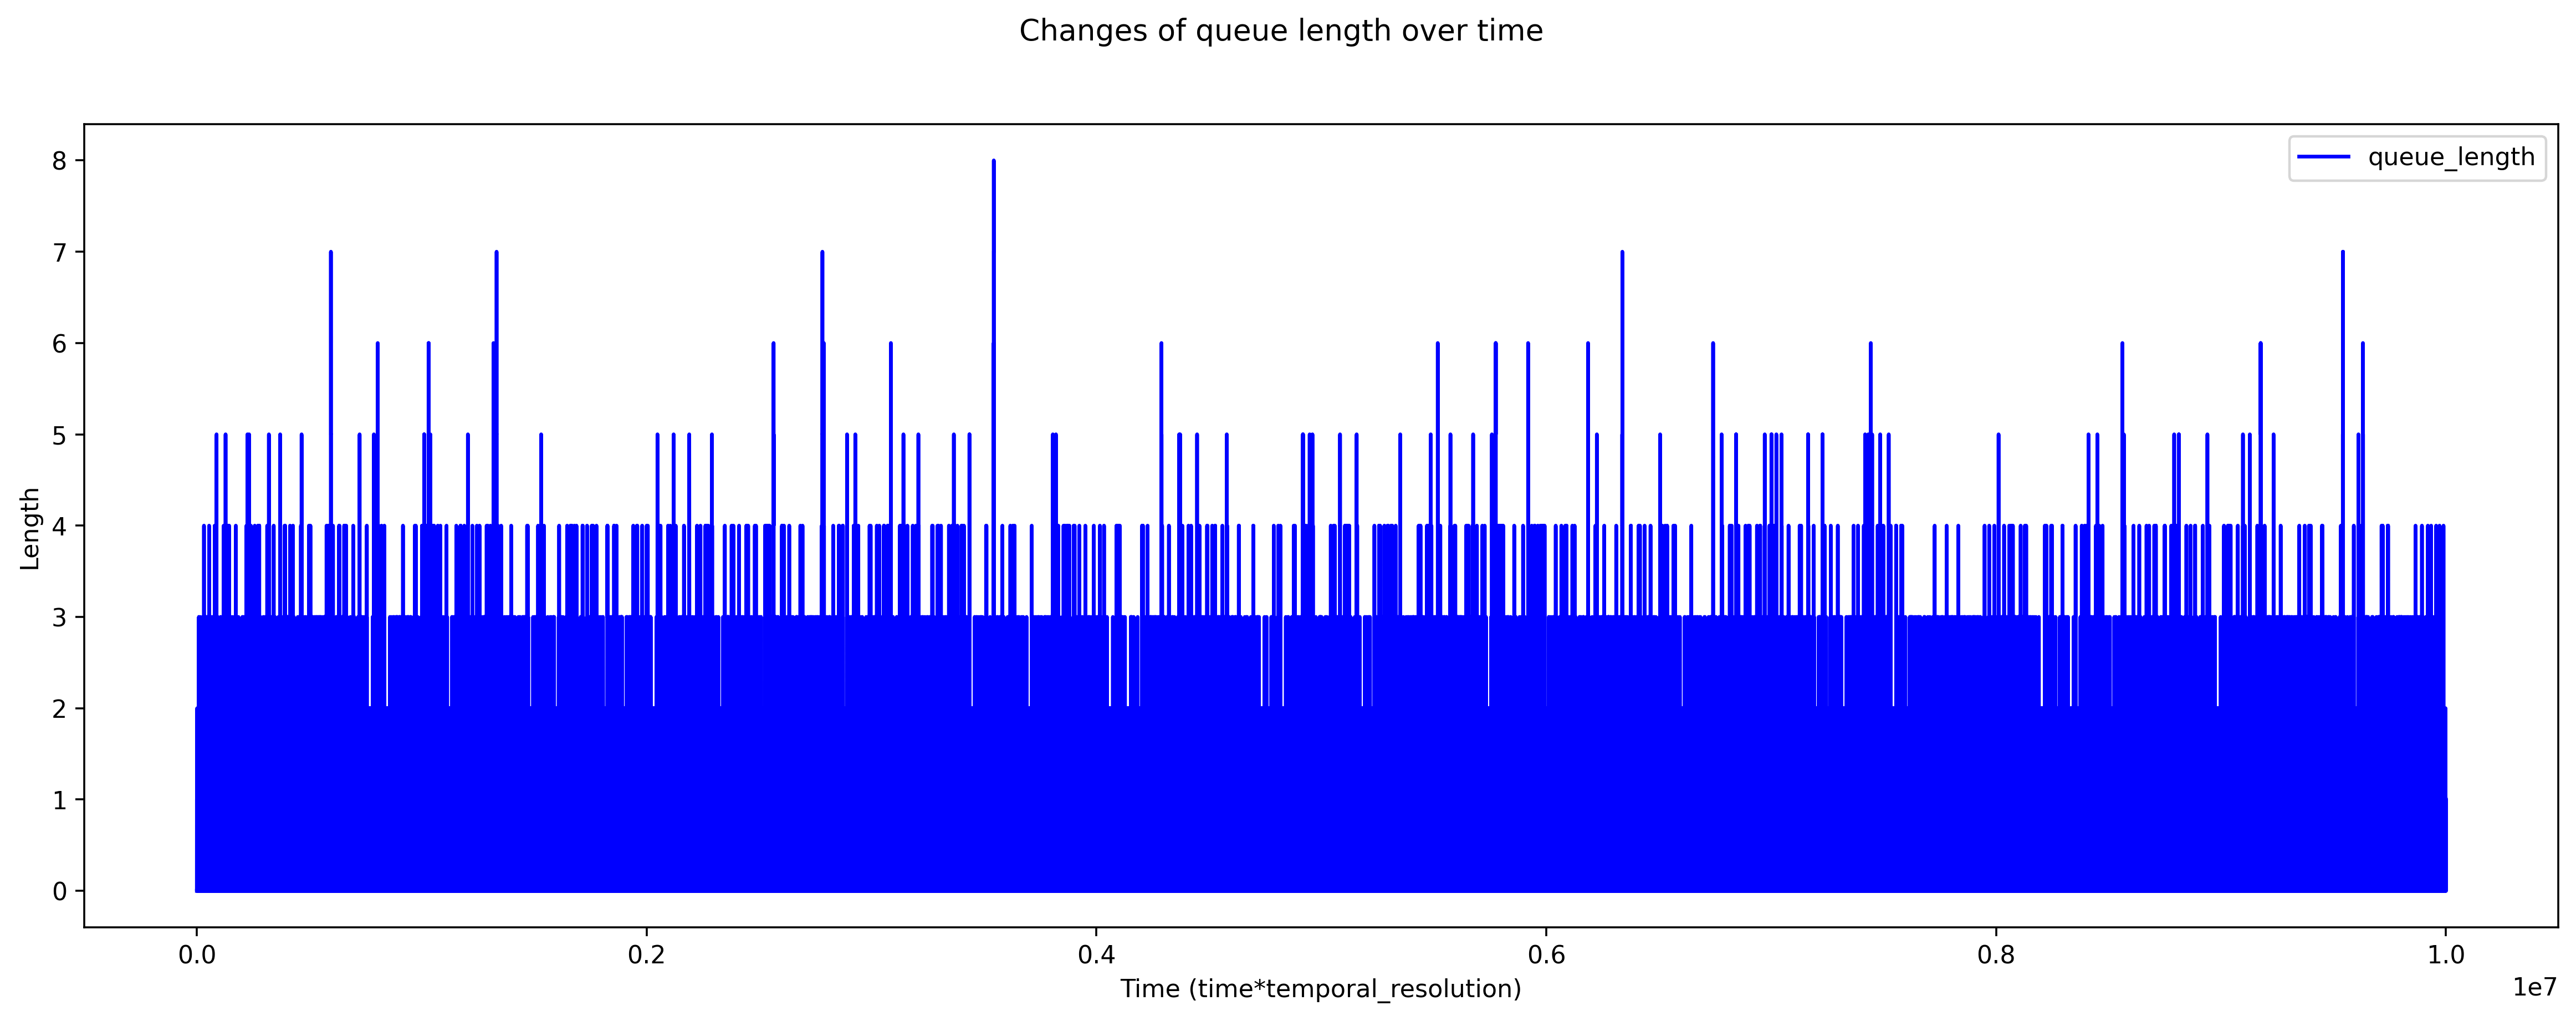

In [109]:
simulate_queue(40, 4, 10) # rho = 0.4
En4 = statistics.mean(queue_lengths)
print("E[n]: ", En4)
plot_queue_data()

E[n]:  0.765561


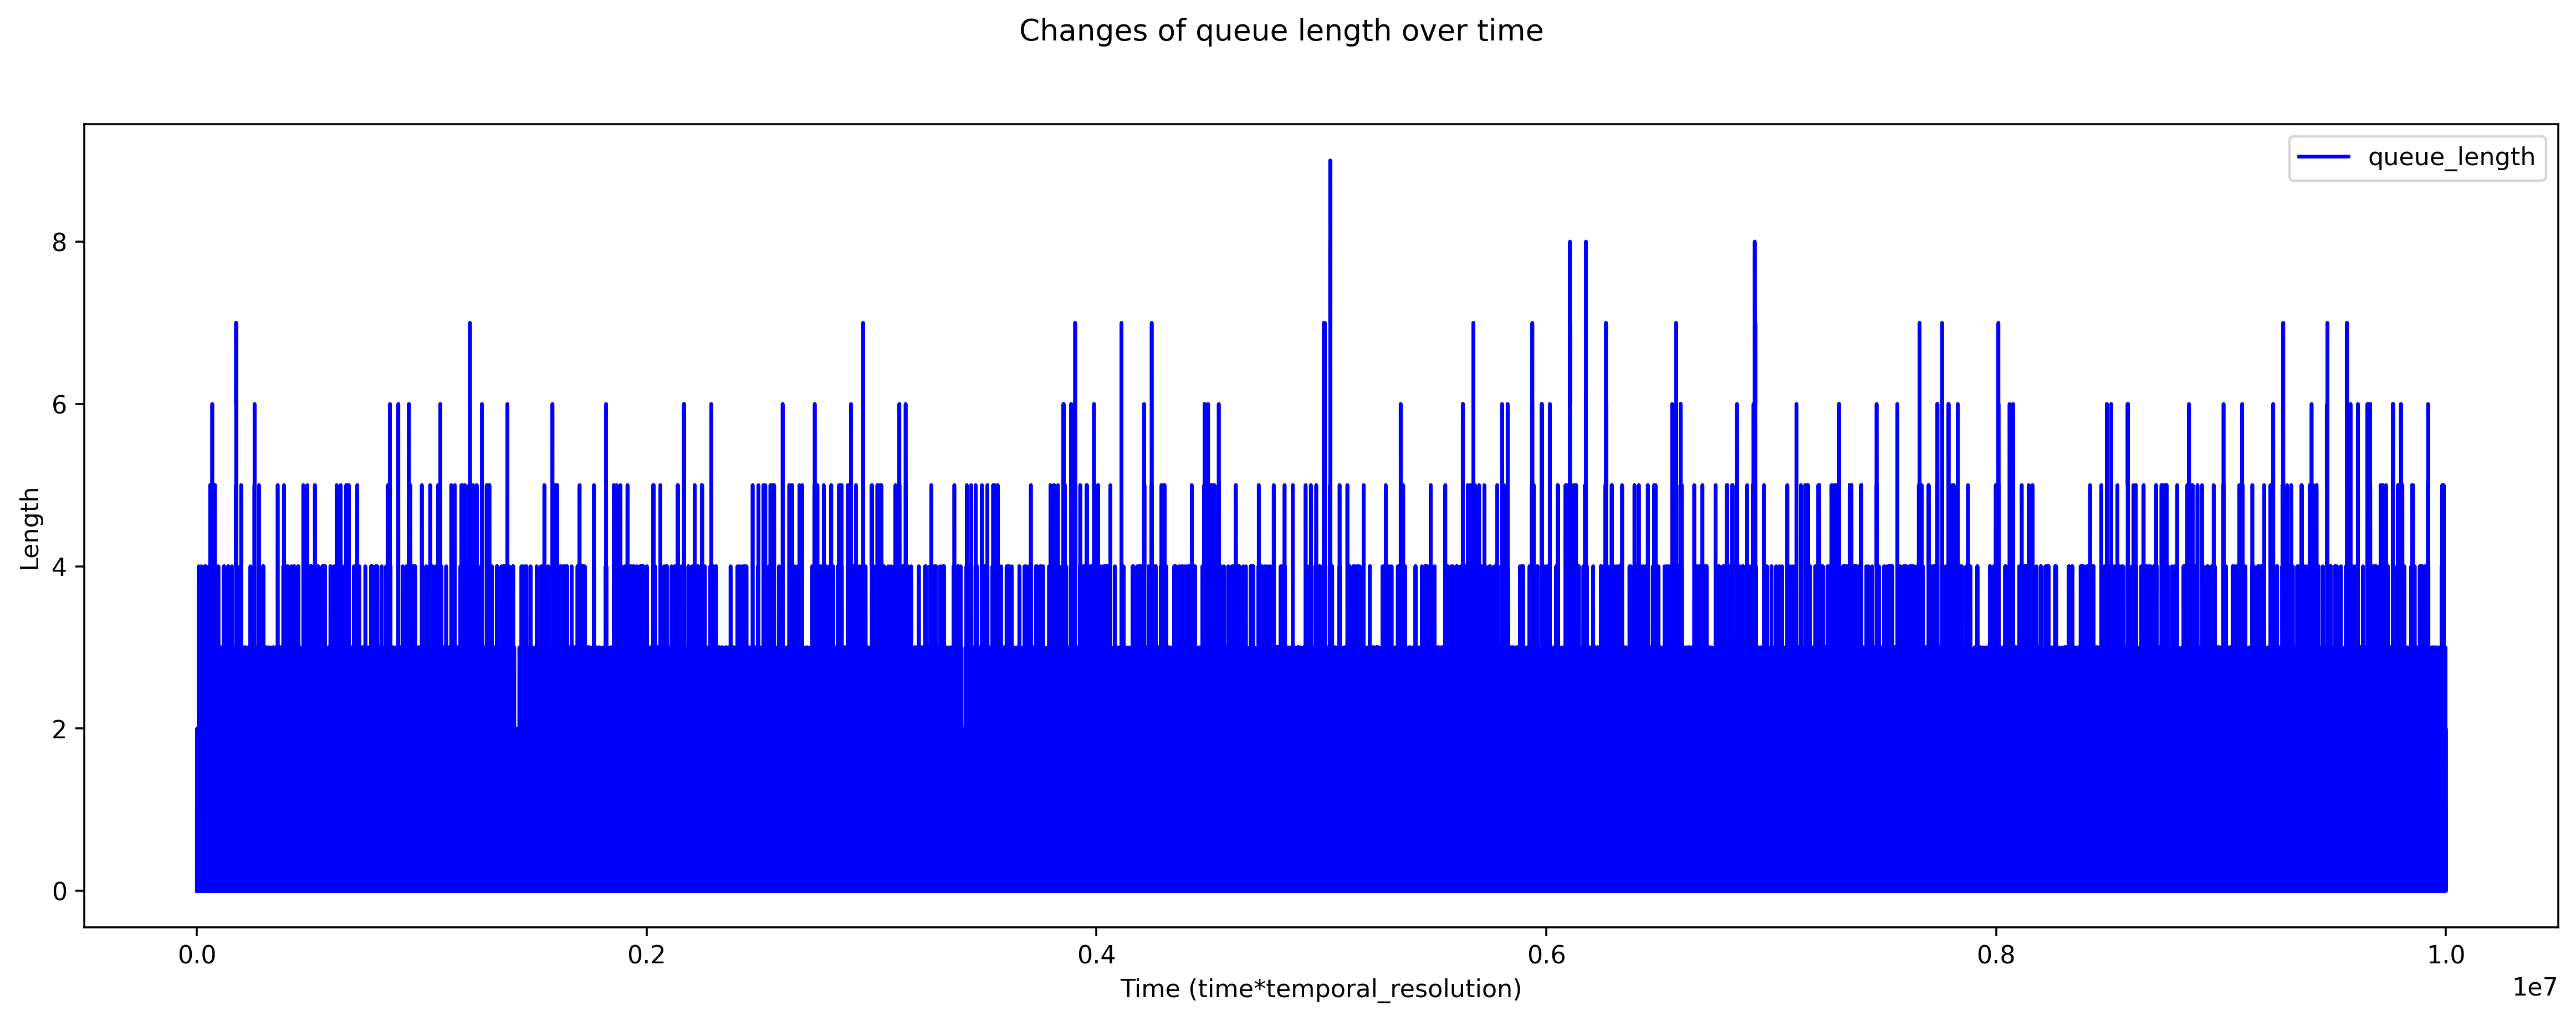

In [108]:
simulate_queue(40, 5, 10) # rho = 0.5
En5 = statistics.mean(queue_lengths)
print("E[n]: ", En5)
plot_queue_data()

E[n]:  1.0624724


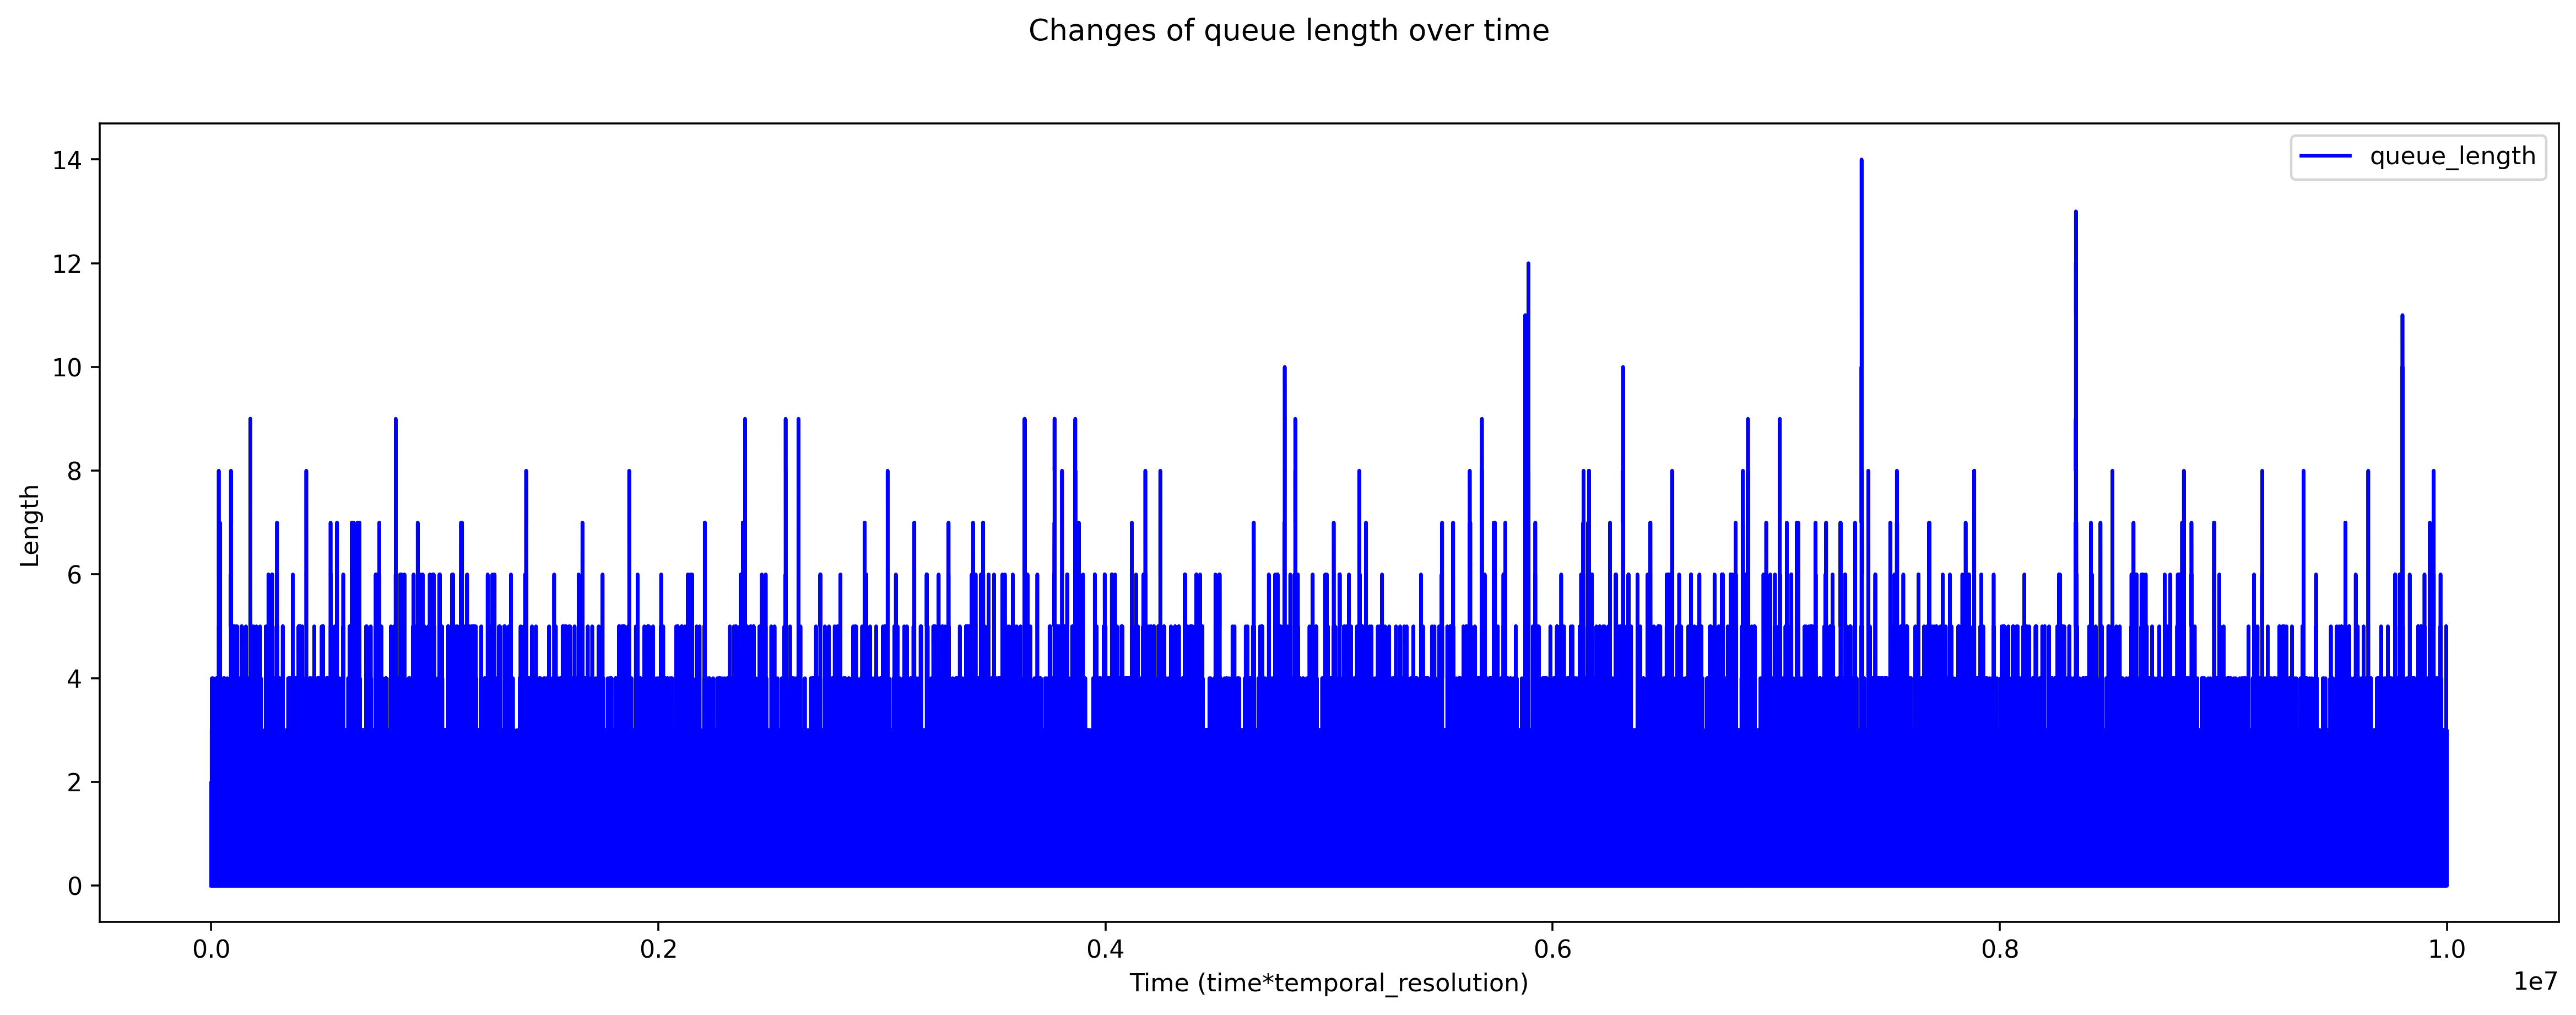

In [107]:
simulate_queue(40, 6, 10) # rho = 0.6
En6 = statistics.mean(queue_lengths)
print("E[n]: ", En6)
plot_queue_data()

E[n]:  1.5520248


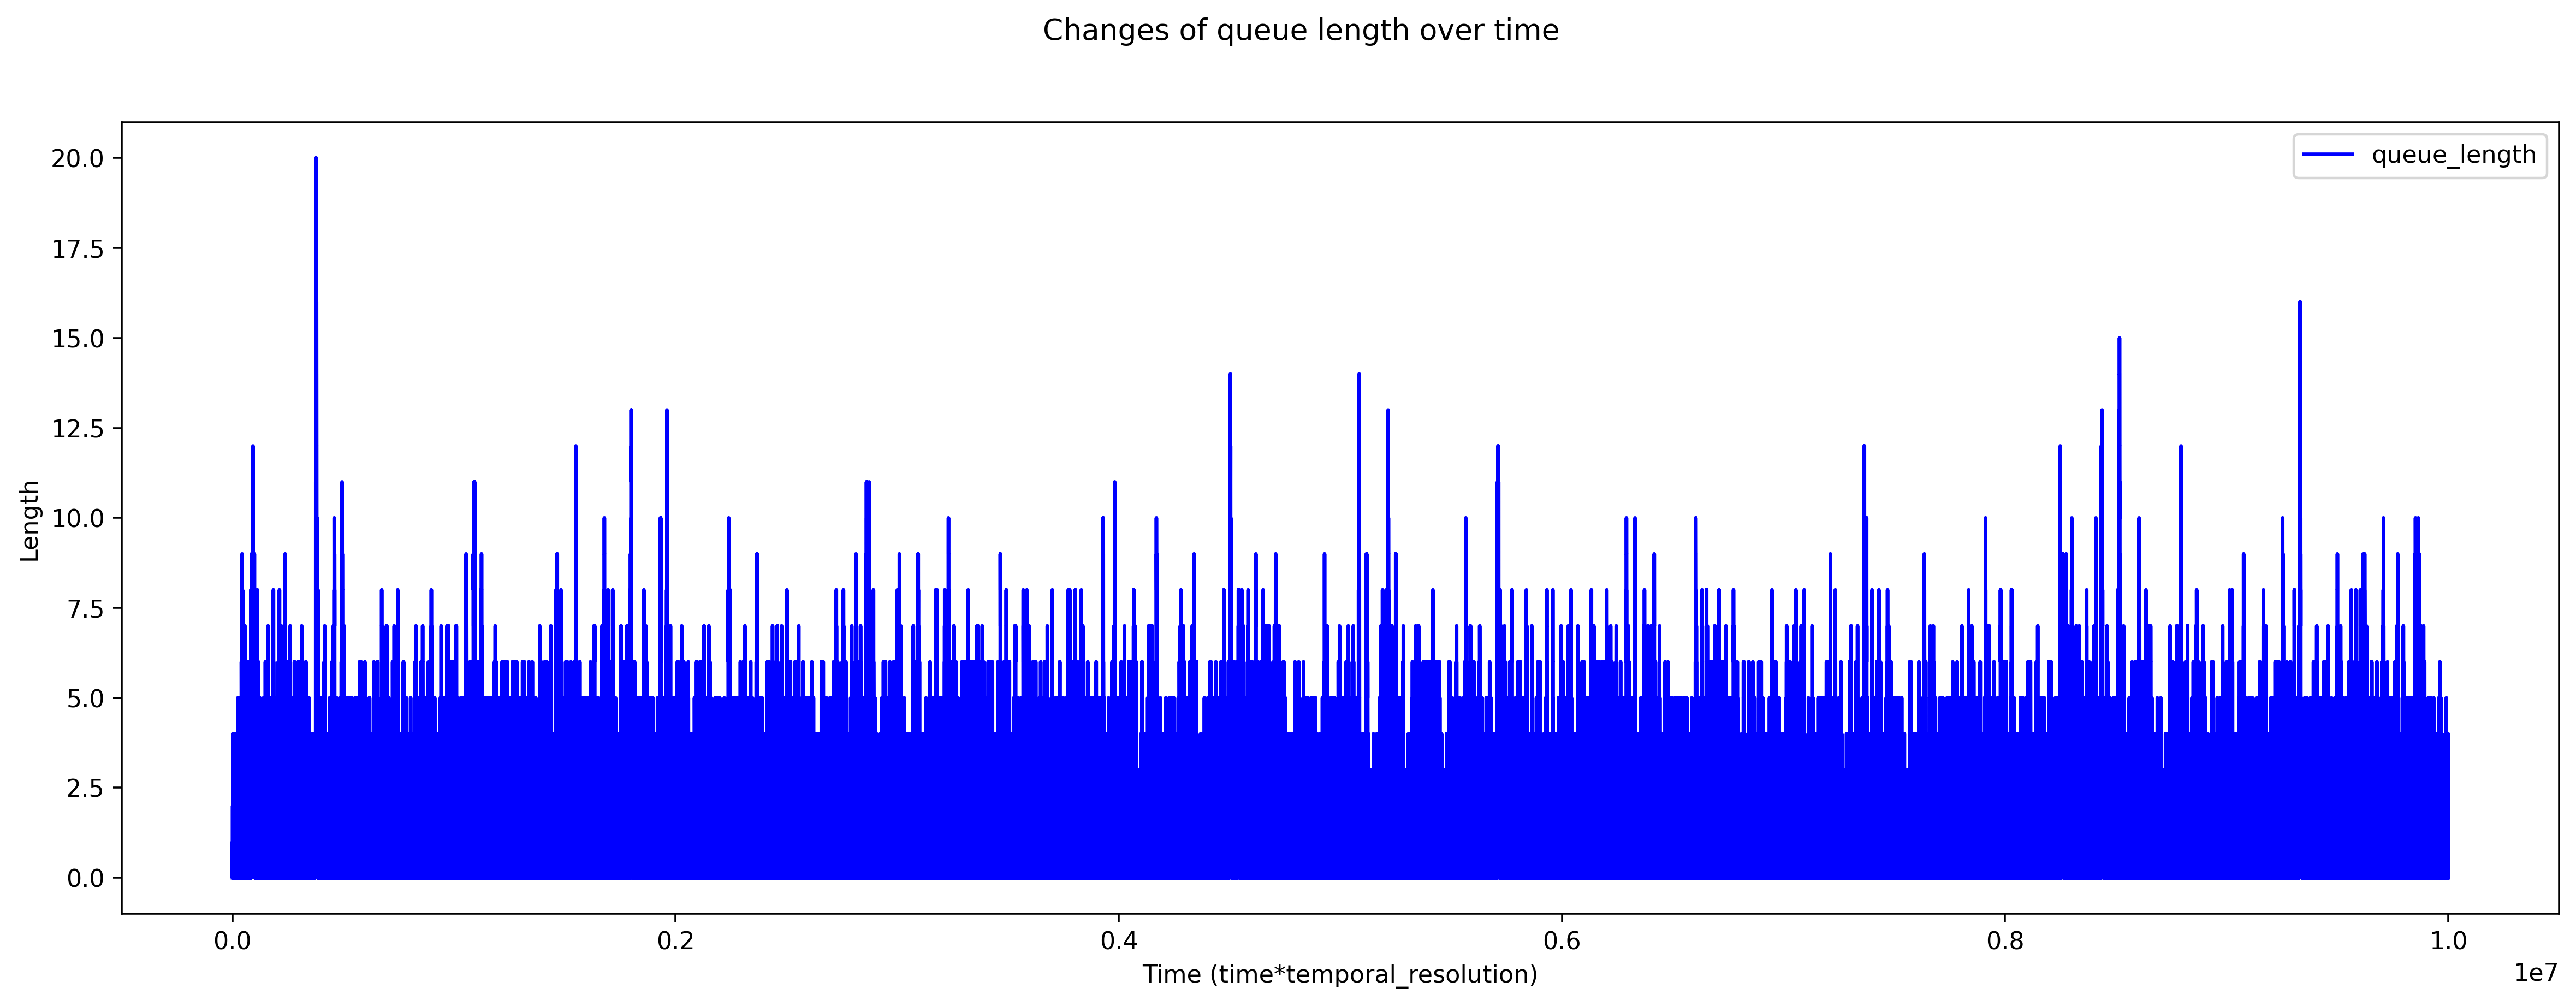

In [106]:
simulate_queue(40, 7, 10) # rho = 0.7
En7 = statistics.mean(queue_lengths)
print("E[n]: ", En7)
plot_queue_data()

E[n]:  2.5209337


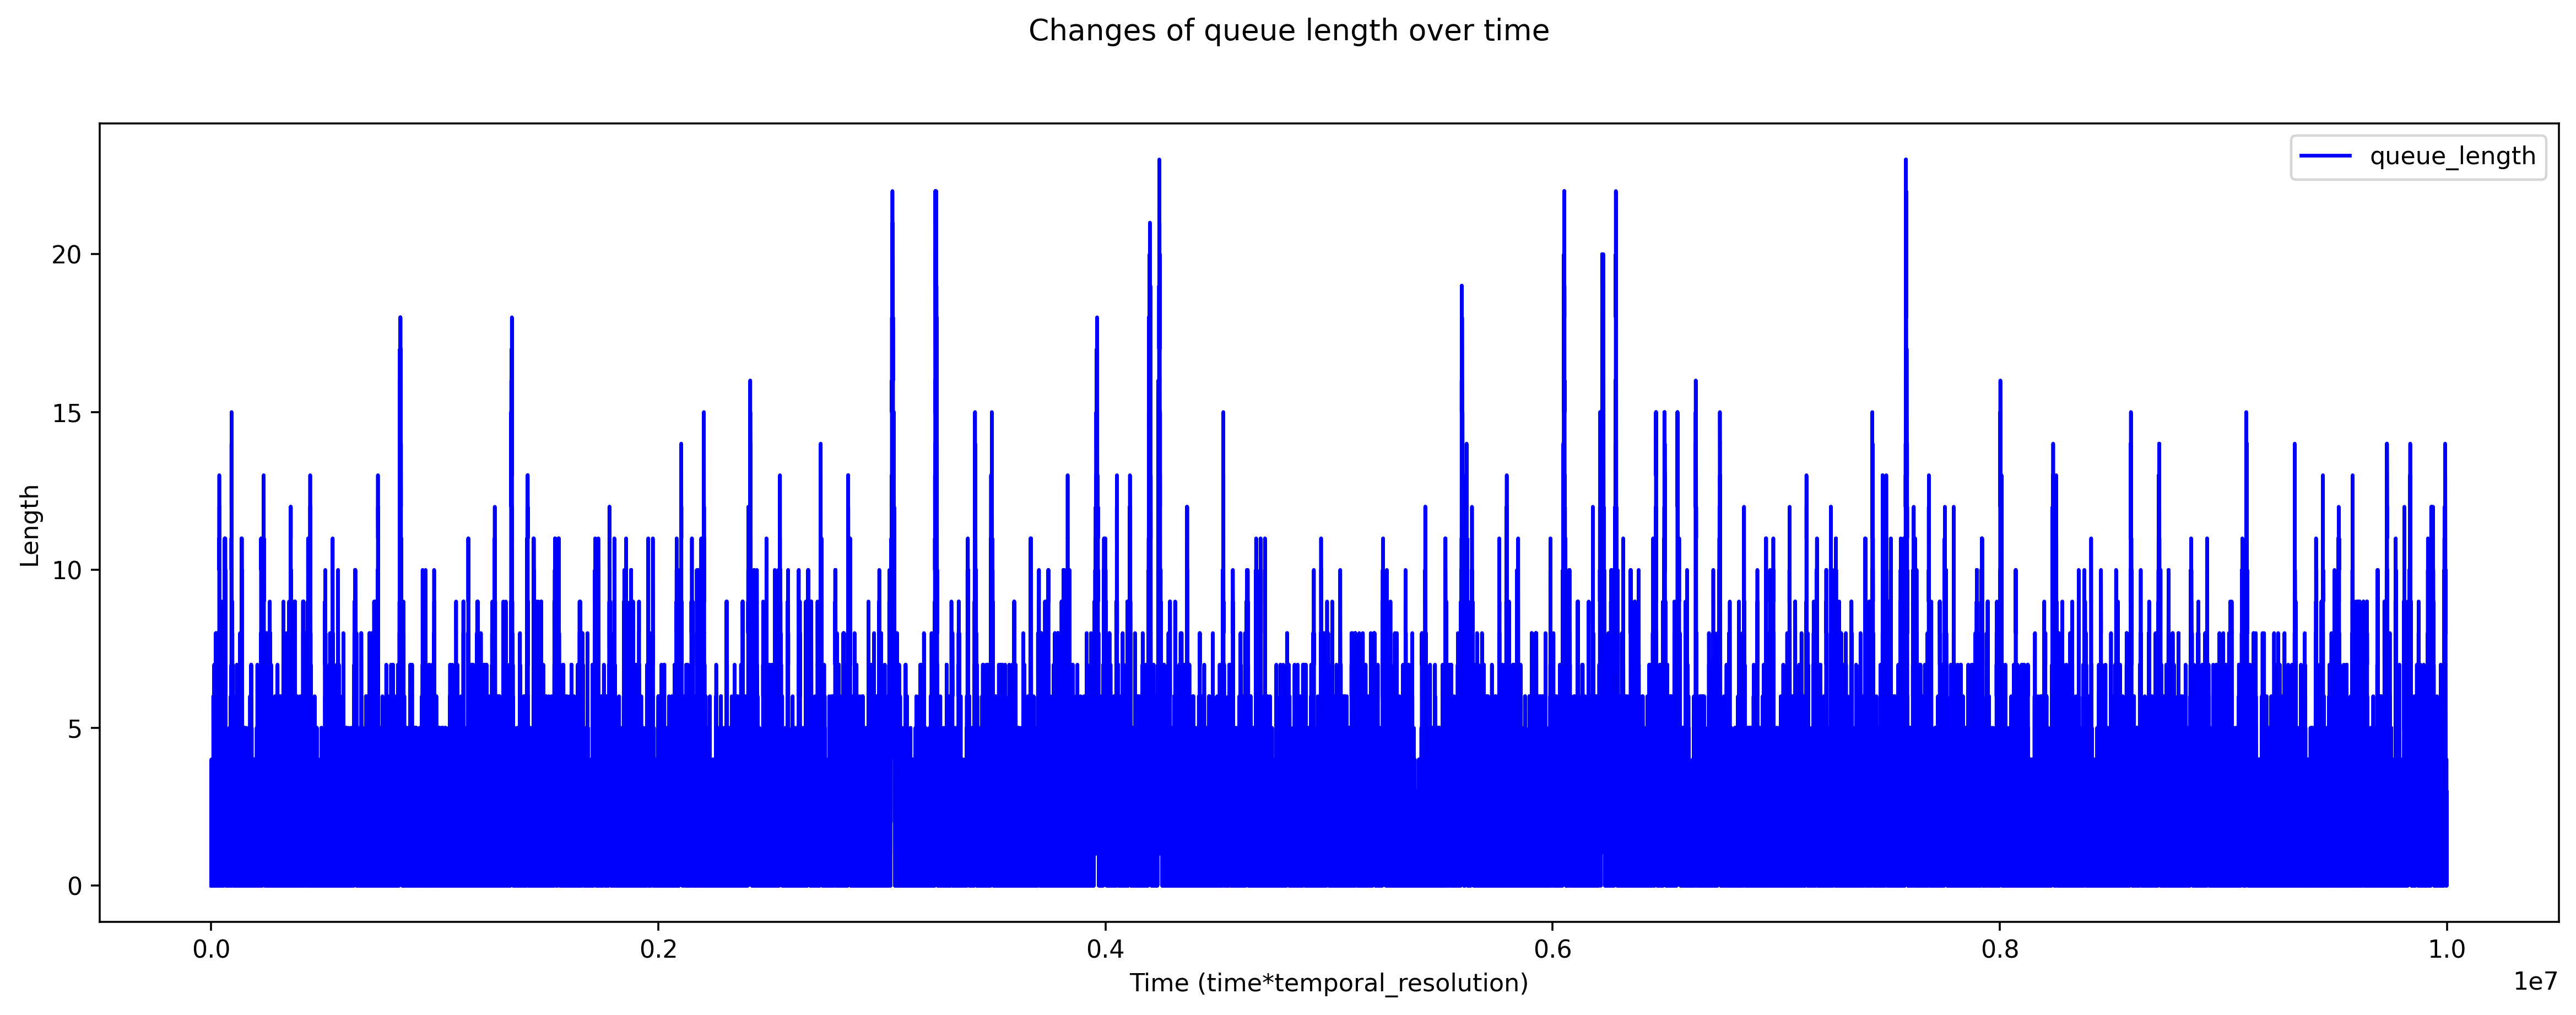

In [105]:
simulate_queue(40, 8, 10) # rho = 0.8
En8 = statistics.mean(queue_lengths)
print("E[n]: ", En8)
plot_queue_data()

E[n]:  5.0789495


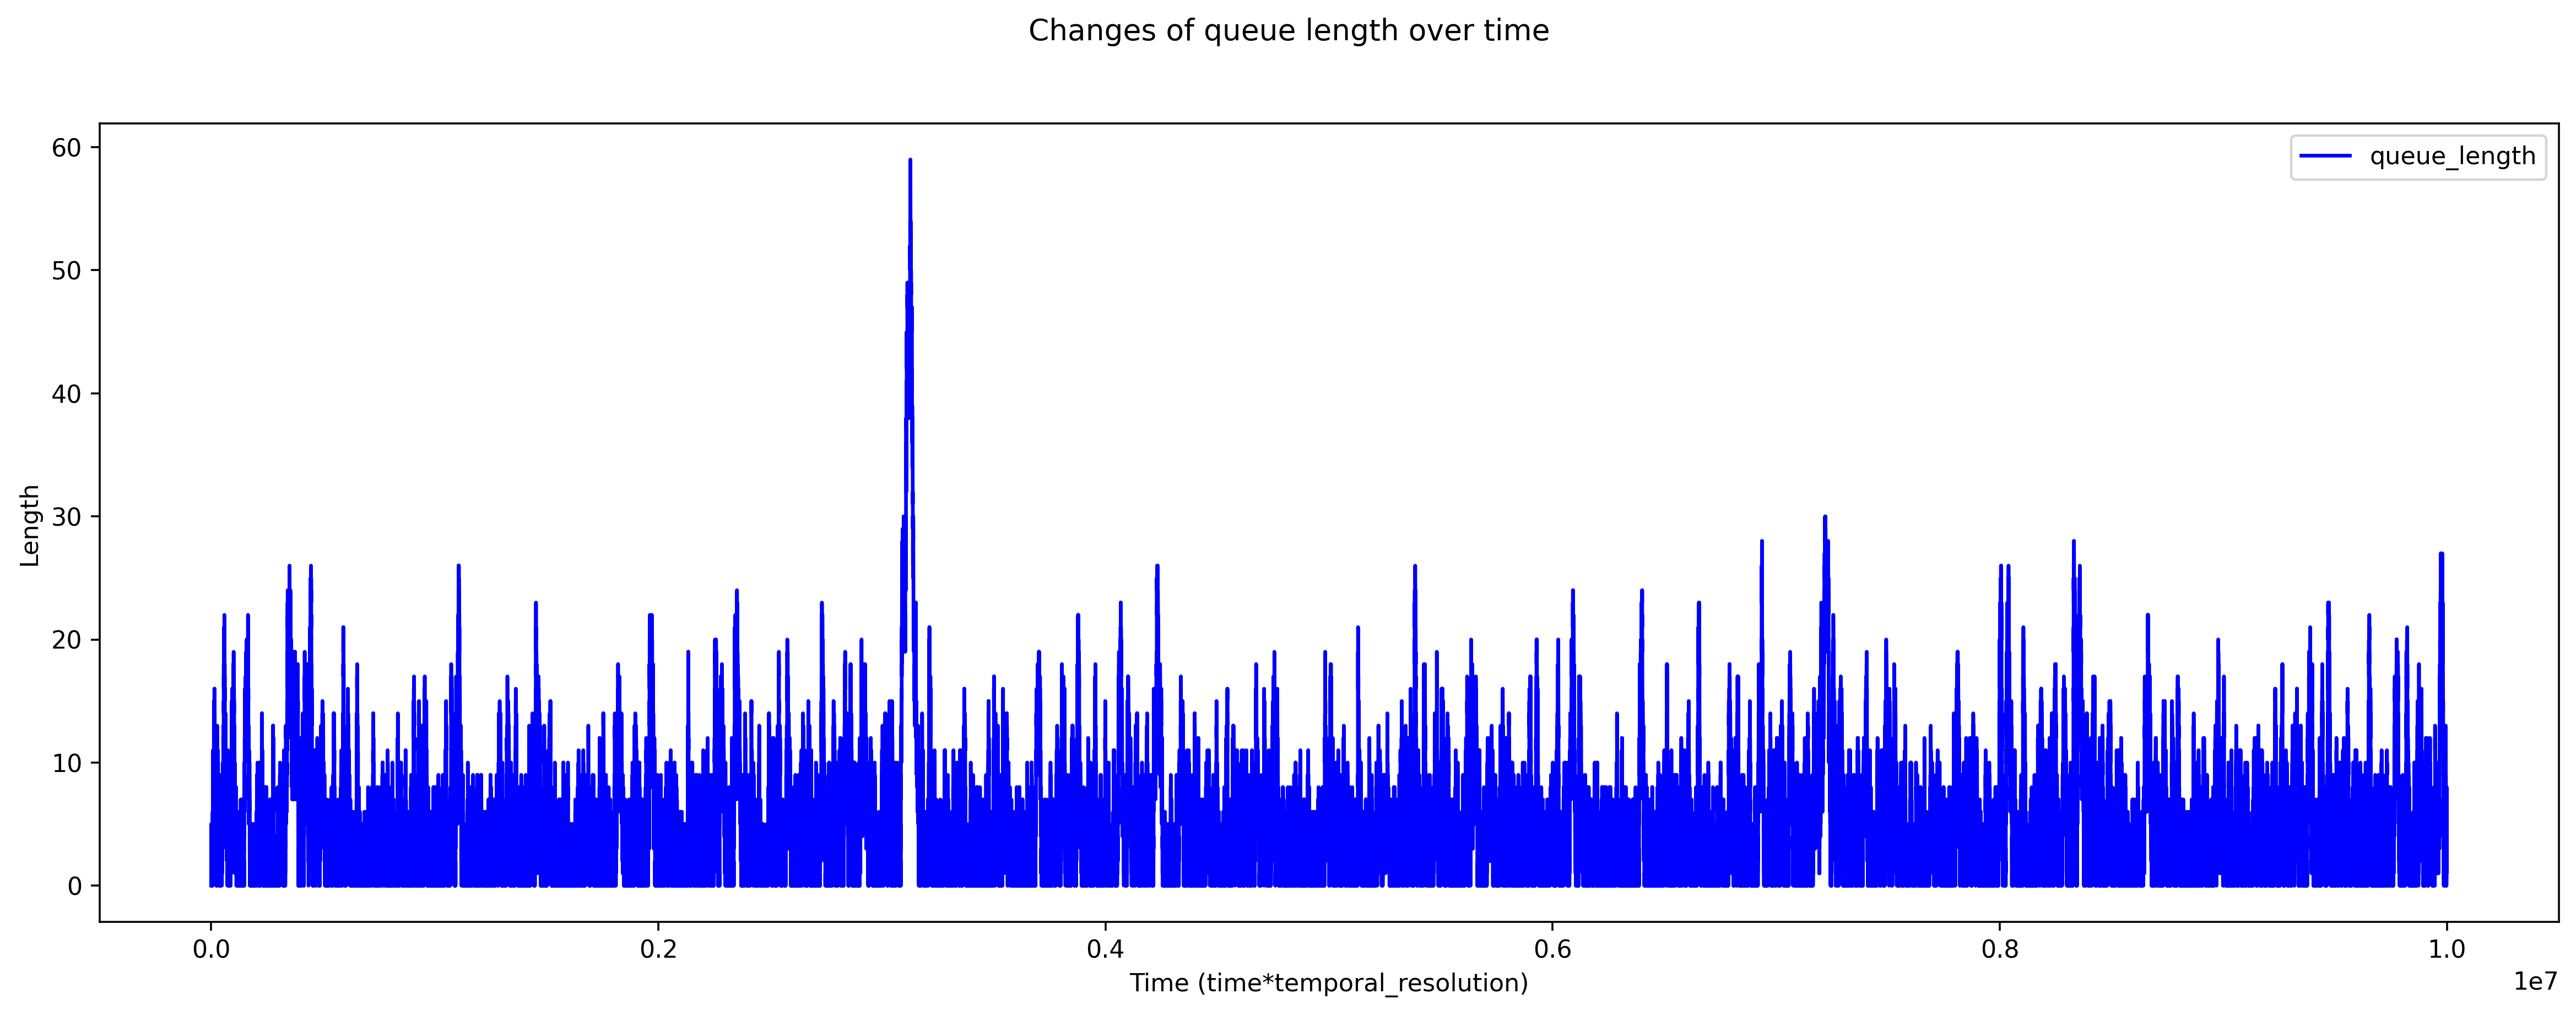

In [104]:
simulate_queue(40, 9, 10) # rho = 0.9
En9 = statistics.mean(queue_lengths)
print("E[n]: ", En9)
plot_queue_data()

E[n]:  742.3818324


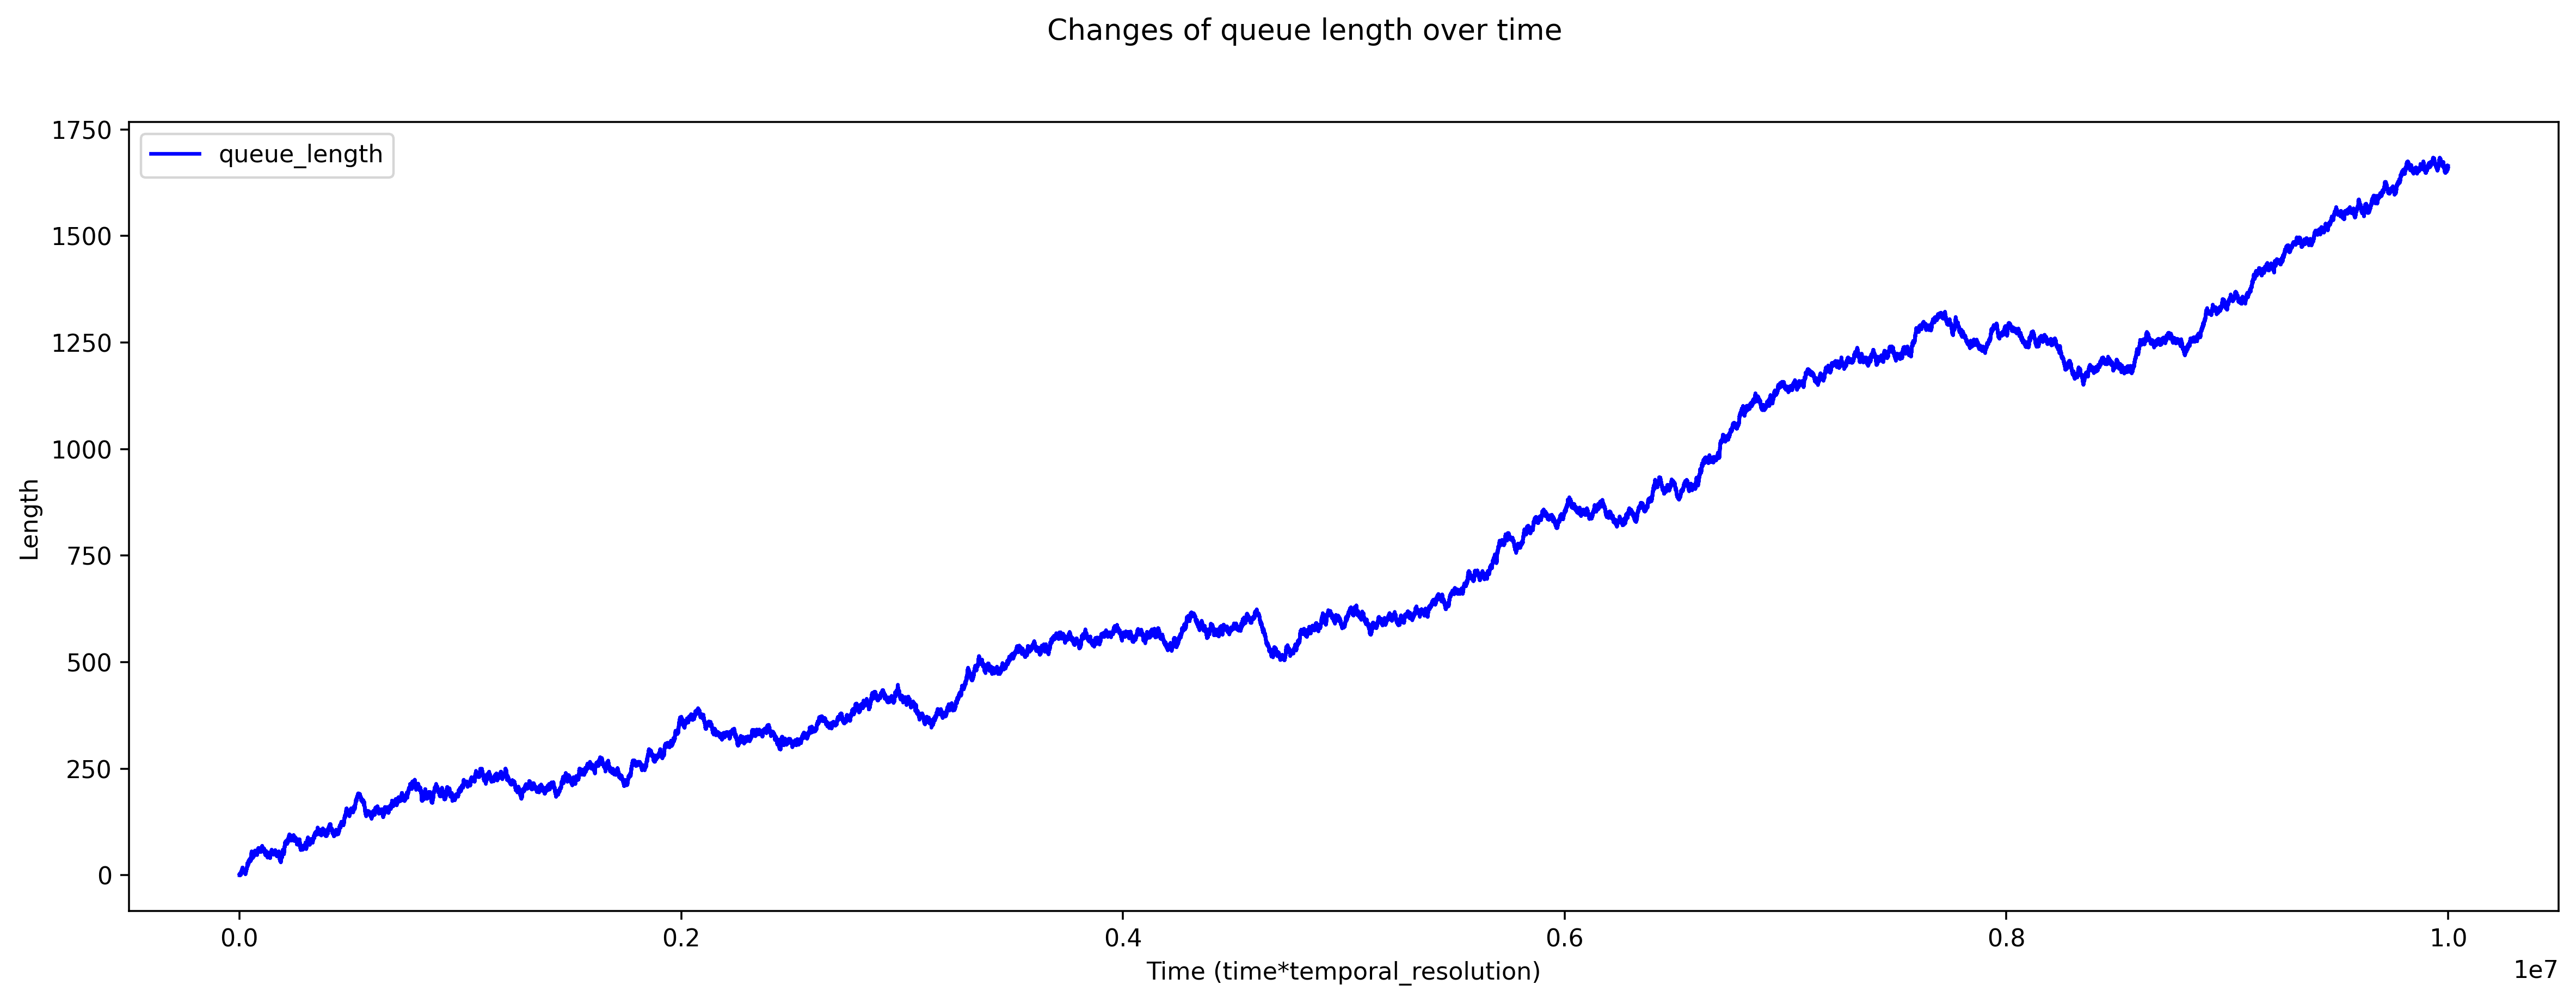

In [89]:
simulate_queue(40, 10, 10) # rho = 1, we won't use this since it diverges
En10 = statistics.mean(queue_lengths)
print("E[n]: ", En10)
plot_queue_data()


[0, 0.1053168, 0.2242908, 0.372851, 0.5450714, 0.765561, 1.0624724, 1.5520248, 2.5209337, 5.0789495]


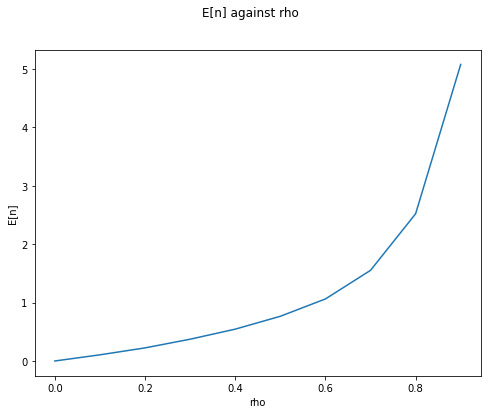

In [18]:
Ens = [0, En1, En2, En3, En4, En5, En6, En7, En8, En9]
print(Ens)
plt.figure(figsize=(8,6)).suptitle('E[n] against rho')
plt.plot(np.linspace(0.0, 0.9, 10),Ens)
plt.xlabel('rho')
plt.ylabel('E[n]')
plt.show()